In [1]:
import numpy as np
from numpy import random
from script_np import *
from math import pi
import turtle as tt
import matplotlib.cm as cm
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api
import pandas as pd
import pingouin as pg
from statsmodels.tsa.stattools import *
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

In [76]:
data = pd.read_csv("data.csv")

In [77]:
data

,"('A',)","('B',)","('C',)","('D',)","('A', 'B')","('A', 'C')","('A', 'D')","('B', 'C')","('B', 'D')","('C', 'D')","('A', 'B', 'C')","('A', 'B', 'D')","('A', 'C', 'D')","('B', 'C', 'D')","('A', 'B', 'C', 'D')"
0,49,24,37,30,16,16,15,14,4,18,2,1,5,2,0
1,50,24,36,30,15,17,17,15,5,20,1,1,5,3,0
2,49,24,35,31,14,14,15,13,6,21,0,1,5,2,0
3,50,24,36,32,12,16,15,14,6,22,3,2,3,2,0
4,50,24,36,31,17,17,14,14,7,21,4,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42,31,25,28,27,21,20,23,14,36,18,10,16,19,17
996,42,32,26,27,23,22,18,22,14,36,20,12,20,19,18
997,43,32,27,27,23,22,19,22,14,41,22,13,23,19,23
998,43,32,26,29,24,24,28,19,14,43,23,19,37,19,36


In [78]:
B_density = np.array(data["('B',)"])
AB_density = np.array(data["('A', 'B')"])
ABC_density = np.array(data["('A', 'B', 'C')"])
ABCD_density = np.array(data["('A', 'B', 'C', 'D')"])

In [57]:
B_density = B_density[1:]-B_density[:-1]
AB_density = AB_density[1:]-AB_density[:-1]
ABC_density = ABC_density[1:]-ABC_density[:-1]
ABCD_density = ABCD_density[1:]-ABCD_density[:-1]

In [43]:
B_density = np.reshape(B_density,(-1,1))
AB_density = np.reshape(AB_density,(-1,1))
ABC_density = np.reshape(ABC_density,(-1,1))
ABCD_density = np.reshape(ABCD_density,(-1,1))

In [44]:
data = np.concatenate((ABC_density,AB_density),axis=1)

In [46]:
# granger causality test

grangercausalitytests(data, maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9556  , p=0.3285  , df_denom=995, df_num=1
ssr based chi2 test:   chi2=0.9584  , p=0.3276  , df=1
likelihood ratio test: chi2=0.9580  , p=0.3277  , df=1
parameter F test:         F=0.9556  , p=0.3285  , df_denom=995, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6580  , p=0.5181  , df_denom=992, df_num=2
ssr based chi2 test:   chi2=1.3227  , p=0.5162  , df=2
likelihood ratio test: chi2=1.3218  , p=0.5164  , df=2
parameter F test:         F=0.6580  , p=0.5181  , df_denom=992, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6011  , p=0.6144  , df_denom=989, df_num=3
ssr based chi2 test:   chi2=1.8160  , p=0.6115  , df=3
likelihood ratio test: chi2=1.8144  , p=0.6118  , df=3
parameter F test:         F=0.6011  , p=0.6144  , df_denom=989, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4065  , p=0.2298  

{1: ({'ssr_ftest': (0.9555655482707627, 0.32854427327273317, 995.0, 1),
   'ssr_chi2test': (0.9584466504263529, 0.32757855362145183, 1),
   'lrtest': (0.9579867144220771, 0.32769464541135973, 1),
   'params_ftest': (0.955565548270554, 0.32854427327278934, 995.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6580108230655336, 0.5181063552912943, 992.0, 2),
   'ssr_chi2test': (1.3226548197506796, 0.5161657160752133, 2),
   'lrtest': (1.321778255013669, 0.5163919919905462, 2),
   'params_ftest': (0.658010823065551, 0.5181063552912943, 992.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.6010826119424698, 0.614387536250495, 989.0, 3),
   'ssr_chi2test': (1.8160109651002017, 0.611456983908784, 3),
   'lrtest': (1.8143574045643618, 0.6118155987605289, 3),
   'params_ftest': (0.6010826119424573, 0.614387536250495, 989.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [65]:
np.mean(AB_density)

24.386

In [58]:
statsmodels.tsa.stattools.acf(ABCD_density)

array([ 1.        ,  0.202496  ,  0.17689892,  0.0070103 , -0.11423931,
       -0.11589766, -0.05953177, -0.02507503, -0.11399913,  0.03735543,
       -0.08790977, -0.10341097, -0.06682055, -0.09290099, -0.10548948,
       -0.03031424, -0.01569571,  0.03309143,  0.05177358,  0.06727571,
        0.0670715 ,  0.04862009, -0.01130752, -0.05339143, -0.08024001,
       -0.03380486, -0.00673834, -0.02616113, -0.05703058, -0.06501005])

In [59]:
statsmodels.tsa.stattools.pacf(ABCD_density)

array([ 1.        ,  0.2026989 ,  0.14200132, -0.05596055, -0.14042776,
       -0.06957625,  0.01731495,  0.01423478, -0.13385168,  0.06026764,
       -0.08391938, -0.10719532, -0.03562938, -0.05753541, -0.09190159,
       -0.01716476, -0.03133138,  0.03121209, -0.015891  ,  0.01082082,
        0.036043  , -0.00392967, -0.06384006, -0.05510878, -0.07681842,
        0.00478171, -0.00205346, -0.06053667, -0.09133105, -0.06294134])

In [9]:
A_density = [3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 2.6515151515151514, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 2.2727272727272725, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 4.166666666666666, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.166666666666666, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.2727272727272725, 2.2727272727272725, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.5151515151515151, 1.5151515151515151, 1.5151515151515151, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 1.1363636363636362, 1.1363636363636362, 1.5151515151515151, 1.8939393939393938, 1.8939393939393938, 2.2727272727272725, 2.2727272727272725, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 4.166666666666666, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.166666666666666, 4.166666666666666, 4.166666666666666, 4.166666666666666, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.924242424242424, 5.303030303030303, 5.681818181818182, 5.681818181818182, 6.0606060606060606, 6.4393939393939394, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 7.196969696969696, 6.8181818181818175, 7.196969696969696, 7.575757575757575, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.333333333333332, 8.333333333333332, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.196969696969696, 6.8181818181818175, 6.8181818181818175, 6.0606060606060606, 6.0606060606060606, 5.681818181818182, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.4393939393939394, 6.4393939393939394, 6.4393939393939394, 6.8181818181818175, 7.196969696969696, 7.575757575757575, 7.954545454545454, 7.954545454545454, 8.333333333333332, 7.954545454545454, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 8.712121212121211, 7.575757575757575, 7.575757575757575, 7.575757575757575, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.196969696969696, 7.575757575757575, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 5.681818181818182, 5.303030303030303, 5.681818181818182, 5.681818181818182, 5.681818181818182, 5.303030303030303, 4.924242424242424, 4.924242424242424]

In [10]:
AB_density = [3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.2727272727272725, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.0303030303030303, 3.0303030303030303, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.6515151515151514, 2.2727272727272725, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.8939393939393938, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 0.7575757575757576, 1.1363636363636362, 1.1363636363636362, 1.1363636363636362, 1.8939393939393938, 2.2727272727272725, 2.6515151515151514, 2.6515151515151514, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.0303030303030303, 3.4090909090909087, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 3.4090909090909087, 3.4090909090909087, 3.4090909090909087, 3.7878787878787876, 3.7878787878787876, 3.7878787878787876, 4.166666666666666, 4.166666666666666, 4.545454545454545, 4.545454545454545, 4.545454545454545, 4.545454545454545, 5.681818181818182, 6.0606060606060606, 6.0606060606060606, 6.0606060606060606, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 6.8181818181818175, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.196969696969696, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.954545454545454, 7.954545454545454, 7.954545454545454, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 8.333333333333332, 7.954545454545454, 7.954545454545454, 8.333333333333332, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.575757575757575, 7.575757575757575, 7.575757575757575, 7.954545454545454, 7.954545454545454, 7.954545454545454, 7.575757575757575, 7.575757575757575, 7.196969696969696, 7.196969696969696]

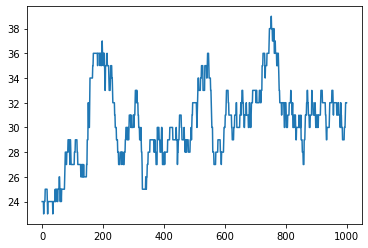

In [74]:
plt.plot(B_density)

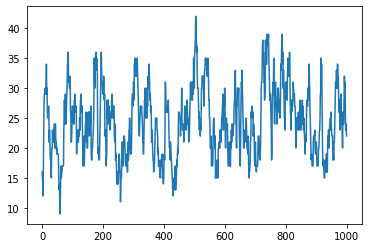

In [79]:
plt.plot(AB_density)

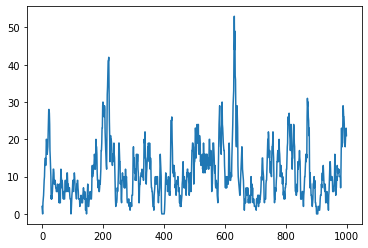

In [80]:
plt.plot(ABC_density)

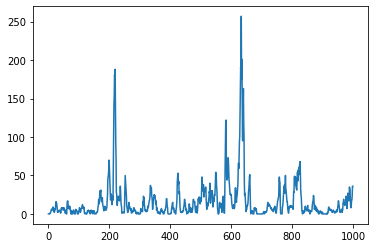

In [70]:
plt.plot(ABCD_density)

In [75]:
adfuller(B_density)

(-3.3272428188910244,
 0.013703778634602815,
 3,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 1866.162229701296)

In [22]:
from statsmodels.tsa.stattools import *
from statsmodels.tsa.stattools import grangercausalitytests


In [104]:
eps = 1e-5
#B_density = np.log(B_density+eps)
B_density = np.reshape(B_density,(-1,1))

In [105]:
#AB_density = np.log(AB_density+eps)
AB_density = np.reshape(AB_density,(-1,1))

In [106]:
#ABC_density = np.log(ABC_density+eps)
ABC_density = np.reshape(ABC_density,(-1,1))

In [107]:
ABCD_density =ABCD_density.reshape(-1,1)

In [648]:
D_density =D_density.reshape(-1,1)
DE_density =DE_density.reshape(-1,1)
DEF_density =DEF_density.reshape(-1,1)

In [96]:
data = np.concatenate((ABC_density,AB_density),axis=1)

In [7]:
#A_density = A_density[1:]-A_density[:-1]
B_density = B_density[1:]-B_density[:-1]
AB_density = AB_density[1:]-AB_density[:-1]
ABC_density = ABC_density[1:]-ABC_density[:-1]
ABCD_density = ABCD_density[1:]-ABCD_density[:-1]
# D_density = D_density[1:]-D_density[:-1]
# DE_density = DE_density[1:]-DE_density[:-1]
# DEF_density = DEF_density[1:]-DEF_density[:-1]

## So far a good set of data:

In [201]:
B_density = np.array([5.2, 5.2, 5.2, 5.2, 5.1, 5.1, 5.1, 5.1, 5.0, 5.1, 5.2, 5.2, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.9, 5.0, 5.1, 5.1, 4.9, 4.9, 5.1, 5.1, 5.2, 5.2, 5.0, 5.1, 5.1, 5.0, 4.9, 4.8, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.0, 4.9, 4.9, 4.9, 4.9, 4.9, 4.7, 4.7, 4.7, 4.7, 4.7, 4.6, 4.5, 4.4, 4.4, 4.2, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.2, 4.2, 4.3, 4.3, 4.2, 4.1, 4.1, 4.0, 4.0, 3.9, 3.9, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.1, 4.0, 4.0, 4.0, 4.3, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.3, 4.2, 4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.0, 3.9, 4.1, 4.2, 4.0, 3.9, 3.9, 3.9, 4.0, 4.0, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.6, 3.7, 3.8, 3.8, 3.7, 3.7, 3.7, 3.8, 3.9, 3.8, 4.1, 4.2, 4.2, 4.2, 4.2, 4.0, 4.0, 3.9, 3.9, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.3, 4.3, 4.4, 4.4, 4.4, 4.5, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.3, 4.3, 4.4, 4.4, 4.5, 4.5, 4.4, 4.4, 4.4, 4.3, 4.3, 4.2, 4.2, 4.1, 4.1, 4.1, 4.0, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.9, 3.9, 3.8, 3.9, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.9, 4.0, 4.1, 4.1, 4.0, 4.0, 4.0, 4.1, 4.2, 4.2, 4.2, 4.3, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.3, 4.3, 4.4, 4.4, 4.5, 4.5, 4.6, 4.5, 4.6, 4.6, 4.6, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.2, 4.2, 4.2, 4.0, 3.9, 3.9, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.9, 3.9, 4.0, 3.8, 3.8, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.5, 3.5, 3.5, 3.6, 3.6, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.5, 3.5, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.6, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.6, 3.6, 3.7, 3.8, 3.8, 3.9, 4.1, 4.1, 4.2, 4.2, 4.1, 4.1, 4.2, 4.2, 4.2, 4.1, 3.9, 3.9, 3.9, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.1, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.3, 4.3, 4.2, 4.2, 4.2, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 3.9, 3.9, 3.9, 3.9, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.3, 4.4, 4.4, 4.4])

In [202]:
AB_density = np.array([2.1, 2.1, 2.1, 2.5, 2.6, 2.9, 3.1, 3.0, 3.0, 3.1, 3.2, 3.5, 3.6, 3.4, 3.6, 3.6, 3.2, 3.3, 3.3, 3.4, 3.6, 3.5, 3.2, 3.1, 3.1, 3.2, 3.2, 3.3, 3.3, 3.4, 3.8, 3.9, 4.0, 3.9, 3.8, 3.8, 3.7, 3.6, 3.5, 3.5, 3.6, 3.6, 3.8, 3.8, 3.8, 3.9, 3.9, 3.8, 3.9, 4.0, 4.0, 4.0, 3.8, 3.9, 4.1, 4.1, 4.2, 4.2, 4.4, 4.4, 4.3, 4.3, 4.1, 3.9, 4.3, 4.2, 4.1, 4.2, 4.2, 4.0, 4.2, 4.3, 4.4, 4.3, 4.3, 4.3, 4.4, 4.5, 4.7, 4.6, 4.6, 4.3, 4.0, 3.9, 3.6, 3.6, 3.5, 3.3, 3.3, 3.3, 3.3, 3.4, 3.2, 3.2, 3.5, 3.2, 3.3, 3.3, 3.3, 3.3, 3.0, 3.1, 3.0, 3.0, 3.1, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.1, 3.1, 3.2, 3.2, 3.2, 3.3, 3.2, 3.2, 3.2, 3.0, 3.1, 3.2, 3.3, 3.3, 3.3, 3.4, 3.6, 3.4, 3.7, 3.9, 4.0, 3.7, 3.6, 3.6, 3.5, 3.4, 3.2, 3.0, 3.2, 3.0, 3.2, 3.3, 2.9, 3.0, 3.0, 3.2, 3.3, 3.2, 3.0, 3.1, 3.3, 3.2, 3.3, 3.2, 3.0, 3.0, 2.9, 2.9, 2.9, 2.9, 2.7, 2.7, 2.8, 3.0, 3.2, 2.9, 2.8, 2.8, 2.7, 2.8, 2.7, 2.6, 2.5, 2.4, 2.5, 2.4, 2.4, 2.5, 2.6, 2.6, 2.4, 2.5, 2.5, 2.7, 2.8, 3.0, 3.0, 3.1, 3.3, 3.5, 3.6, 3.8, 3.7, 3.6, 3.5, 3.5, 3.5, 3.5, 3.4, 3.5, 3.4, 3.3, 3.5, 3.7, 3.7, 3.9, 3.9, 3.9, 4.2, 4.1, 4.1, 4.2, 4.3, 4.2, 4.2, 4.3, 4.4, 4.4, 4.4, 4.6, 4.4, 4.4, 4.1, 4.1, 3.9, 4.0, 4.0, 4.0, 4.1, 3.8, 3.7, 3.5, 3.0, 2.8, 2.7, 2.7, 2.9, 3.0, 3.2, 3.3, 3.1, 3.1, 3.1, 3.1, 3.1, 3.0, 2.7, 2.5, 2.6, 2.6, 2.6, 2.7, 2.8, 3.2, 3.4, 3.5, 3.5, 3.5, 3.4, 3.6, 3.5, 3.6, 3.4, 3.5, 3.6, 3.7, 3.8, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.0, 3.8, 3.9, 3.8, 3.9, 4.0, 4.0, 3.9, 4.1, 3.8, 4.1, 4.0, 3.9, 3.7, 3.8, 3.6, 3.7, 3.9, 3.7, 3.8, 3.8, 3.8, 4.0, 4.0, 3.8, 3.9, 4.4, 4.2, 4.0, 4.3, 4.3, 4.1, 4.0, 4.1, 4.1, 4.2, 4.1, 4.2, 4.2, 4.1, 3.9, 3.8, 3.8, 3.7, 3.8, 3.8, 3.7, 3.9, 4.0, 4.0, 3.9, 3.8, 3.6, 3.6, 3.6, 3.5, 3.5, 3.2, 3.0, 3.1, 3.1, 3.2, 3.1, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.0, 3.0, 3.0, 3.0, 3.0, 3.2, 3.2, 3.2, 2.9, 3.0, 3.0, 2.9, 2.7, 2.7, 2.7, 2.6, 2.5, 2.6, 2.8, 2.9, 2.8, 2.8, 2.9, 3.0, 2.9, 2.9, 3.0, 3.2, 3.1, 2.9, 2.8, 2.8, 2.8, 3.0, 3.1, 2.9, 2.7, 2.6, 2.7, 2.6, 2.5, 2.4, 2.4, 2.4, 2.4, 2.7, 2.7, 2.8, 2.9, 2.9, 2.9, 2.9, 2.8, 2.8, 3.0, 2.9, 2.9, 3.0, 2.8, 2.7, 2.8, 2.7, 3.0, 3.0, 3.0, 2.8, 3.1, 3.1, 3.0, 3.2, 3.3, 3.3, 3.3, 3.1, 3.1, 3.1, 3.2, 3.3, 3.1, 3.1, 3.3, 3.3, 3.3, 3.4, 3.5, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.4, 3.6, 3.7, 3.7, 3.8, 3.8, 3.8, 3.9, 3.8, 3.8, 3.6, 3.4, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7, 3.7, 3.8, 3.8, 3.7, 3.8, 3.9, 3.7, 3.8, 3.9, 4.0, 3.7, 3.6, 3.7, 3.6, 3.6, 3.5, 3.5, 3.3, 3.5, 3.4, 3.4, 3.4, 3.4, 3.2, 3.2, 3.2, 3.2, 3.2, 3.1, 2.9, 3.3, 3.3, 3.6, 3.5, 3.5, 3.5, 3.7, 3.6, 3.6, 3.7, 3.6, 3.7])

In [203]:
ABC_density = np.array([0.6, 0.5, 0.5, 0.5, 0.6, 0.5, 0.4, 0.5, 0.7, 0.7, 0.7, 0.8, 1.0, 1.1, 1.1, 1.3, 1.5, 1.6, 1.8, 1.7, 1.6, 1.6, 1.8, 1.9, 2.0, 1.9, 1.9, 1.7, 1.6, 1.6, 1.5, 1.6, 1.7, 1.7, 1.7, 1.9, 2.0, 1.9, 1.9, 1.8, 1.8, 1.8, 1.7, 2.0, 1.9, 1.7, 1.7, 1.8, 1.9, 1.9, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.4, 2.4, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.1, 2.0, 2.1, 2.1, 2.0, 2.0, 2.0, 2.3, 2.3, 2.5, 2.6, 2.9, 2.7, 2.7, 2.5, 2.3, 2.3, 2.4, 2.7, 2.8, 2.7, 2.4, 2.1, 2.2, 2.1, 2.0, 1.9, 1.7, 1.9, 1.9, 2.2, 2.2, 2.2, 2.1, 2.2, 1.9, 1.7, 1.3, 1.2, 1.1, 1.1, 1.2, 1.4, 1.3, 1.4, 1.1, 1.3, 1.3, 1.3, 1.3, 1.2, 1.4, 1.4, 1.5, 1.5, 1.7, 1.7, 1.6, 1.4, 1.7, 1.8, 1.8, 1.9, 2.0, 2.0, 2.2, 2.3, 2.6, 2.6, 2.5, 2.5, 2.6, 2.7, 2.7, 2.7, 2.6, 2.7, 2.6, 2.6, 2.6, 2.4, 2.3, 2.1, 2.0, 2.0, 1.6, 1.2, 1.1, 1.1, 1.1, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.2, 1.2, 1.0, 0.9, 0.8, 0.5, 0.5, 0.4, 0.3, 0.5, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.8, 1.1, 1.4, 1.5, 1.7, 1.7, 1.9, 1.8, 1.7, 1.7, 1.7, 1.7, 1.8, 2.0, 2.1, 2.1, 2.3, 1.9, 2.1, 2.2, 2.0, 2.1, 2.1, 2.2, 2.1, 2.1, 2.2, 2.3, 2.3, 2.2, 2.1, 2.1, 1.7, 2.0, 1.8, 1.8, 1.8, 1.7, 1.4, 1.7, 1.6, 1.4, 1.4, 1.7, 1.8, 1.6, 1.6, 1.6, 1.6, 1.4, 1.5, 1.4, 1.4, 1.4, 1.6, 1.8, 1.8, 1.6, 1.6, 1.8, 1.4, 1.3, 1.4, 1.2, 1.1, 1.2, 1.3, 1.5, 1.3, 0.9, 0.8, 0.6, 0.9, 1.0, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.5, 1.5, 1.6, 1.7, 1.8, 2.0, 1.8, 1.7, 1.7, 1.8, 1.7, 1.7, 1.9, 2.0, 2.2, 2.2, 2.3, 2.5, 2.4, 2.4, 2.8, 2.9, 3.2, 2.9, 2.7, 2.6, 2.6, 2.7, 2.8, 2.8, 2.6, 2.5, 2.6, 2.4, 2.4, 1.9, 2.1, 2.1, 2.2, 2.3, 2.5, 2.8, 2.7, 2.8, 2.9, 2.8, 2.7, 2.6, 2.4, 2.7, 2.7, 2.5, 2.6, 2.6, 2.6, 2.7, 2.7, 2.6, 2.5, 2.3, 2.4, 2.4, 2.3, 2.4, 2.8, 2.3, 2.3, 2.2, 2.2, 1.9, 1.9, 2.2, 2.4, 2.4, 2.3, 2.2, 2.5, 2.5, 2.8, 2.6, 2.5, 2.4, 2.4, 2.5, 2.7, 2.6, 2.4, 2.1, 1.7, 1.4, 1.4, 1.5, 1.4, 1.7, 1.6, 1.5, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4, 1.6, 1.5, 1.6, 1.5, 1.7, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.9, 2.1, 2.0, 1.9, 1.9, 1.8, 2.0, 2.0, 1.8, 1.9, 1.9, 1.9, 2.1, 2.0, 2.2, 2.3, 2.3, 2.4, 2.2, 2.3, 2.4, 2.5, 2.5, 2.7, 2.7, 2.7, 2.5, 2.4, 2.7, 2.4, 2.2, 2.1, 2.3, 2.3, 2.0, 1.8, 1.7, 1.6, 1.4, 1.5, 1.4, 1.5, 1.6, 1.6, 1.5, 1.6, 1.6, 1.7, 1.8, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 1.9, 2.1, 2.3, 2.1, 2.0, 1.9, 1.8, 1.6, 1.6, 1.6, 1.3, 1.3, 1.1, 1.1, 1.2, 1.0, 1.0, 1.2, 1.2, 1.3, 1.4, 1.4, 1.6, 1.8, 1.8, 1.6, 1.7, 2.0, 2.3, 2.5, 2.6, 2.9, 3.0, 2.9, 3.0, 3.0, 3.0, 2.7, 2.4, 1.9, 2.0, 1.9, 1.8, 1.3, 1.6, 1.8, 1.6, 1.6, 1.7, 1.4, 1.5, 1.3, 1.0, 1.2, 1.2, 1.1, 1.1, 1.3, 1.3, 1.4])

In [95]:
B = pd.Series([5.2, 5.2, 5.2, 5.2, 5.1, 5.1, 5.1, 5.1, 5.0, 5.1, 5.2, 5.2, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.2, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.9, 5.0, 5.1, 5.1, 4.9, 4.9, 5.1, 5.1, 5.2, 5.2, 5.0, 5.1, 5.1, 5.0, 4.9, 4.8, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.0, 4.9, 4.9, 4.9, 4.9, 4.9, 4.7, 4.7, 4.7, 4.7, 4.7, 4.6, 4.5, 4.4, 4.4, 4.2, 4.1, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.2, 4.2, 4.3, 4.3, 4.2, 4.1, 4.1, 4.0, 4.0, 3.9, 3.9, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.1, 4.0, 4.0, 4.0, 4.3, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.3, 4.2, 4.2, 4.2, 4.2, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.0, 3.9, 4.1, 4.2, 4.0, 3.9, 3.9, 3.9, 4.0, 4.0, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.6, 3.7, 3.8, 3.8, 3.7, 3.7, 3.7, 3.8, 3.9, 3.8, 4.1, 4.2, 4.2, 4.2, 4.2, 4.0, 4.0, 3.9, 3.9, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.3, 4.3, 4.4, 4.4, 4.4, 4.5, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.3, 4.3, 4.4, 4.4, 4.5, 4.5, 4.4, 4.4, 4.4, 4.3, 4.3, 4.2, 4.2, 4.1, 4.1, 4.1, 4.0, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.9, 3.9, 3.8, 3.9, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.8, 3.8, 3.9, 4.0, 4.1, 4.1, 4.0, 4.0, 4.0, 4.1, 4.2, 4.2, 4.2, 4.3, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.3, 4.3, 4.4, 4.4, 4.5, 4.5, 4.6, 4.5, 4.6, 4.6, 4.6, 4.4, 4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.2, 4.2, 4.2, 4.0, 3.9, 3.9, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.9, 3.9, 4.0, 3.8, 3.8, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.5, 3.5, 3.5, 3.6, 3.6, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.5, 3.5, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.4, 3.4, 3.4, 3.4, 3.5, 3.5, 3.6, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.6, 3.6, 3.7, 3.8, 3.8, 3.9, 4.1, 4.1, 4.2, 4.2, 4.1, 4.1, 4.2, 4.2, 4.2, 4.1, 3.9, 3.9, 3.9, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.1, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.4, 4.3, 4.3, 4.2, 4.2, 4.2, 4.1, 4.1, 4.1, 4.1, 4.1, 4.0, 3.9, 3.9, 3.9, 3.9, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.3, 4.4, 4.4, 4.4])

In [209]:
AB = pd.Series(AB_density)

In [97]:
ABC = pd.Series(ABC_density)

In [108]:
grangercausalitytests(data, maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.5720 , p=0.0007  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=11.6068 , p=0.0007  , df=1
likelihood ratio test: chi2=11.5399 , p=0.0007  , df=1
parameter F test:         F=11.5720 , p=0.0007  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.1445  , p=0.0003  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=16.3710 , p=0.0003  , df=2
likelihood ratio test: chi2=16.2381 , p=0.0003  , df=2
parameter F test:         F=8.1445  , p=0.0003  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7813  , p=0.0006  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=17.4665 , p=0.0006  , df=3
likelihood ratio test: chi2=17.3153 , p=0.0006  , df=3
parameter F test:         F=5.7813  , p=0.0006  , df_denom=990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9068  , p=0.0006  

{1: ({'ssr_ftest': (11.571978367048597, 0.0006961485394464862, 996.0, 1),
   'ssr_chi2test': (11.606833723575852, 0.0006570992552223363, 1),
   'lrtest': (11.539924756049004, 0.0006811739692693296, 1),
   'params_ftest': (11.571978367048741, 0.0006961485394464201, 996.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (8.14446962718516, 0.0003101696087989051, 993.0, 2),
   'ssr_chi2test': (16.370958082438644, 0.0002786709002943288, 2),
   'lrtest': (16.238135956446058, 0.0002978060928988486, 2),
   'params_ftest': (8.144469627184963, 0.0003101696087989762, 993.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (5.781305077484009, 0.0006421268142717384, 990.0, 3),
   'ssr_chi2test': (17.46654897651987, 0.0005665579080379003, 3),
   'lrtest': (17.315313596684064, 0.0006086716048321718, 3),
   'params_ftest': (5.781305077483878, 0.0006421268142718296, 990.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0.

In [123]:
# pacf = statsmodels.tsa.stattools.pacf(A_density,method="ols")
statsmodels.tsa.stattools.pacf(ABC_density)

array([ 1.        ,  0.19414918,  0.04285158,  0.00313269, -0.05742232,
       -0.08527368, -0.07229204,  0.04108967, -0.0823237 ,  0.04817934,
       -0.02946789,  0.07450412,  0.00541129, -0.03014503, -0.05853185,
        0.0094909 , -0.04210194, -0.01727775,  0.00491157, -0.07167258,
       -0.03941785, -0.06082146, -0.06151048, -0.06366593, -0.01445994,
        0.00816738, -0.01207053, -0.06363467, -0.04824619, -0.06092   ])

In [124]:
statsmodels.tsa.stattools.acf(ABC_density)

array([ 1.00000000e+00,  1.93954834e-01,  7.87722243e-02,  2.59181759e-02,
       -4.61981871e-02, -9.86608019e-02, -1.07509288e-01, -5.87299482e-03,
       -8.34706832e-02,  2.19241254e-02, -8.30060491e-03,  7.57175674e-02,
        4.22041359e-02, -6.57842241e-03, -4.32239504e-02, -2.34916648e-02,
       -4.81568456e-02, -5.75532133e-02, -1.72359500e-03, -7.10997655e-02,
       -4.93317740e-02, -6.85157077e-02, -6.27213295e-02, -7.55628464e-02,
       -2.74067860e-02,  1.19795613e-02,  3.90334298e-04, -2.42749249e-02,
       -3.84477396e-02, -4.54169677e-02])

In [549]:
dd = {"B":B_density,
    "AB":AB_density,
     "ABC":ABC_density,
      "D":D_density,
      "DE":DE_density,
      "DEF":DEF_density
     }


In [58]:
dd = {"B":B_density,
    "AB":AB_density,
     "ABC":ABC_density,
      "ABCD":ABCD_density
     }

In [59]:
df = pd.DataFrame(dd,columns = ['B','AB','ABC',"ABCD"])

In [130]:
df.pcorr().round(3)# before diff

,A_density,B_density,AB_density,ABC_density,AD_density
A_density,1.000,0.044,0.628,-0.079,0.722
B_density,0.044,1.000,-0.140,-0.101,-0.138
AB_density,0.628,-0.140,1.000,0.593,-0.425
ABC_density,-0.079,-0.101,0.593,1.000,0.219
AD_density,0.722,-0.138,-0.425,0.219,1.000


In [142]:
df.pcorr().round(3)# after diff

,A_density,B_density,AB_density,ABC_density,AD_density
A_density,1.000,-0.067,0.266,-0.086,0.003
B_density,-0.067,1.000,-0.037,-0.017,0.024
AB_density,0.266,-0.037,1.000,0.073,-0.097
ABC_density,-0.086,-0.017,0.073,1.000,-0.055
AD_density,0.003,0.024,-0.097,-0.055,1.000


In [102]:
ABC.corr(B)

-0.029318596688185667

In [60]:
pg.partial_corr(data=df, x='ABC', y='B', covar='AB')

,n,r,CI95%,p-val
pearson,1000,0.040345,"[-0.02, 0.1]",0.202623


In [61]:
pg.partial_corr(data=df, x='ABC', y='AB', covar='B')

,n,r,CI95%,p-val
pearson,1000,0.535627,"[0.49, 0.58]",2.945987e-75


## Also a good set of data for partial correlation

In [126]:
B_density = np.array([2.3, 2.3, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.3, 2.3, 2.2, 2.3, 2.3, 2.3, 2.5, 2.5, 2.5, 2.4, 2.5, 2.6, 2.6, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.8, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.7, 2.6, 2.7, 2.7, 2.6, 2.6, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 2.9, 2.9, 2.9, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.6, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, 2.6, 2.6, 2.7, 2.7, 2.7, 2.6, 2.6, 2.5, 2.5, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.4, 2.3, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.2, 2.2, 2.2, 2.2, 2.2, 2.0, 2.0, 1.9, 1.9, 1.9, 1.9, 1.8, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8, 1.8, 1.8, 1.7, 1.7, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.9, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9, 1.9, 1.9, 1.9, 1.8, 1.8, 1.9, 1.9, 1.9, 1.9, 1.9, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.7, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9, 1.9, 1.9, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9, 1.8, 1.8, 1.8, 1.8, 1.8, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7])

In [127]:
AB_density = np.array([0.6, 0.7, 0.6, 0.8, 0.8, 0.7, 0.9, 0.9, 1.0, 1.2, 1.2, 1.3, 1.1, 1.2, 1.5, 1.5, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.3, 1.1, 1.1, 1.2, 1.1, 1.1, 1.2, 1.3, 1.6, 1.6, 1.9, 2.0, 2.0, 1.9, 1.9, 1.8, 1.8, 1.8, 1.6, 1.7, 1.8, 2.0, 2.0, 2.0, 2.2, 2.2, 2.1, 2.3, 2.2, 2.2, 2.1, 2.1, 2.1, 2.0, 2.0, 1.9, 1.8, 1.9, 1.9, 2.0, 2.0, 2.0, 1.9, 1.9, 2.0, 2.0, 1.9, 2.0, 1.9, 1.9, 1.8, 1.8, 1.9, 2.1, 2.1, 2.2, 2.1, 2.1, 2.1, 2.1, 2.0, 2.0, 2.0, 2.1, 2.0, 1.8, 1.9, 2.0, 2.0, 1.8, 2.2, 2.1, 2.2, 2.3, 2.5, 2.6, 2.4, 2.4, 2.3, 2.3, 2.4, 2.4, 2.3, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.6, 2.8, 2.8, 2.9, 3.0, 2.7, 2.6, 2.6, 2.6, 2.6, 2.5, 2.4, 2.3, 2.3, 2.4, 2.3, 2.4, 2.5, 2.5, 2.4, 2.4, 2.4, 2.4, 2.2, 1.9, 1.8, 1.6, 1.8, 1.7, 1.7, 1.6, 1.6, 1.6, 1.6, 1.8, 1.9, 2.0, 2.1, 2.3, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.3, 2.2, 2.3, 2.3, 2.1, 2.2, 2.2, 2.0, 1.9, 2.0, 2.0, 1.9, 1.8, 1.8, 1.8, 1.7, 1.7, 1.6, 1.3, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.7, 1.7, 1.8, 1.7, 1.6, 1.6, 1.6, 1.6, 1.7, 1.6, 1.7, 1.6, 1.5, 1.5, 1.7, 1.9, 2.1, 2.0, 2.1, 2.1, 2.1, 2.3, 2.4, 2.5, 2.5, 2.5, 2.4, 2.4, 2.2, 2.2, 2.1, 1.9, 2.2, 2.2, 2.4, 2.5, 2.4, 2.4, 2.2, 2.1, 2.1, 2.1, 2.0, 1.9, 1.9, 1.7, 1.8, 1.9, 1.8, 1.7, 1.6, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.6, 1.5, 1.5, 1.5, 1.5, 1.7, 1.7, 1.8, 1.8, 1.7, 2.1, 2.1, 2.1, 2.4, 2.5, 2.6, 2.5, 2.4, 2.4, 2.3, 2.2, 2.2, 2.2, 2.2, 2.2, 2.1, 1.9, 1.7, 1.7, 1.7, 1.7, 1.8, 1.7, 1.8, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0, 2.0, 2.1, 2.1, 2.2, 2.0, 2.0, 2.1])

In [128]:
ABC_density = np.array([0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.1, 1.2, 1.1, 1.1, 0.9, 0.8, 0.7, 0.5, 0.4, 0.3, 0.4, 0.6, 0.6, 0.9, 1.1, 1.0, 1.1, 1.3, 1.4, 1.3, 1.4, 1.3, 1.2, 1.4, 1.4, 1.5, 1.5, 1.5, 1.4, 1.3, 1.3, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.4, 1.6, 1.5, 1.4, 1.4, 1.3, 1.4, 1.3, 1.3, 1.5, 1.3, 1.1, 1.2, 1.1, 1.0, 0.9, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9, 1.0, 0.8, 0.7, 0.7, 0.6, 0.4, 0.2, 0.3, 0.5, 0.5, 0.5, 0.6, 0.4, 0.6, 0.6, 0.7, 0.8, 0.8, 0.8, 0.9, 0.8, 0.9, 0.9, 1.1, 1.2, 1.2, 1.2, 1.2, 1.1, 1.2, 1.1, 0.9, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.4, 1.2, 1.4, 1.5, 1.6, 1.8, 1.8, 1.7, 1.7, 1.7, 1.7, 1.7, 1.6, 1.6, 1.5, 1.4, 1.4, 1.2, 1.5, 1.6, 1.4, 1.3, 1.2, 1.0, 0.9, 0.9, 0.9, 0.8, 0.8, 0.9, 0.7, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.0, 0.9, 0.9, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.4, 1.5, 1.3, 1.5, 1.3, 1.2, 1.0, 1.0, 0.7, 0.7, 0.6, 0.7, 0.5, 0.5, 0.5, 0.4, 0.6, 0.6, 0.6, 0.6, 0.4, 0.5, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.4, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.4, 0.6, 0.7, 0.9, 0.9, 0.8, 1.0, 1.3, 1.2, 1.2, 1.0, 0.9, 0.9, 1.1, 1.0, 0.7, 1.0, 1.1, 0.9, 1.2, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.2, 1.1, 1.2, 1.0, 0.7, 0.7, 0.7, 0.7, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.7, 0.7, 0.8, 0.7, 0.9, 1.1, 1.2, 1.1, 1.1, 1.4, 1.6, 1.6, 1.4, 1.6, 1.6, 1.6, 1.6, 1.8, 1.7, 1.8, 1.8, 1.8, 1.6, 1.8, 1.9, 1.9, 1.9, 1.9, 1.9, 1.8, 1.5, 1.5, 1.4, 1.4, 1.3, 1.2, 1.0, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.2, 1.3, 1.4, 1.3, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2])

In [64]:
ABC.corr(AB)

0.4532092013857563

## Data transformation code

In [67]:
eps = 1e-5
B_density = B_density/np.median(B_density)+1
AB_density = AB_density/np.median(AB_density)+1
ABC_density = ABC_density/np.median(ABC_density)+1
ABCD_density = ABCD_density/np.median(ABCD_density)+1
B_density = np.log(B_density+eps)
B_density = np.reshape(B_density,(-1,1))
AB_density = np.log(AB_density+eps)
AB_density = np.reshape(AB_density,(-1,1))
ABC_density = np.log(ABC_density+eps)
ABC_density = np.reshape(ABC_density,(-1,1))
ABCD_density = np.log(ABCD_density+eps)
ABCD_density = np.reshape(ABCD_density,(-1,1))

In [248]:
data = np.concatenate((B_density,AB_density),axis=1)

## Very good data

In [487]:
B_density = np.array([20, 20, 20, 21, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 23, 23, 23, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 27, 27, 26, 26, 26, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 29, 30, 28, 28, 28, 27, 27, 28, 29, 29, 30, 30, 30, 30, 30, 30, 30, 33, 33, 33, 33, 33, 32, 33, 32, 33, 33, 32, 32, 32, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 28, 28, 28, 28, 30, 30, 29, 29, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 27, 28, 28, 28, 28, 28, 28, 28, 27, 26, 27, 27, 27, 27, 25, 25, 25, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 26, 27, 27, 27, 27, 28, 28, 27, 27, 27, 27, 27, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 25, 26, 27, 27, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 30, 30, 29, 29, 29, 29, 29, 29, 29, 28, 28, 27, 28, 28, 29, 29, 29, 30, 29, 29, 29, 28, 26, 26, 26, 27, 26, 26, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27])

In [488]:
AB_density = np.array([10, 10, 10, 12, 14, 15, 19, 20, 19, 21, 23, 25, 24, 23, 22, 22, 21, 21, 21, 19, 22, 22, 21, 20, 19, 20, 19, 20, 20, 21, 22, 18, 17, 22, 24, 24, 25, 26, 27, 29, 30, 27, 25, 25, 25, 24, 23, 21, 22, 21, 25, 26, 25, 25, 25, 24, 26, 26, 25, 25, 26, 27, 27, 30, 30, 29, 29, 28, 28, 27, 27, 28, 28, 31, 32, 34, 34, 34, 34, 34, 33, 31, 31, 31, 31, 32, 33, 35, 33, 38, 39, 37, 38, 37, 40, 41, 42, 42, 40, 40, 43, 42, 40, 39, 39, 36, 34, 36, 34, 33, 33, 33, 33, 33, 33, 34, 33, 33, 30, 28, 28, 28, 29, 30, 31, 27, 27, 26, 27, 29, 32, 31, 36, 36, 37, 39, 38, 39, 42, 43, 43, 42, 40, 41, 40, 39, 40, 39, 40, 37, 39, 41, 39, 40, 36, 36, 36, 36, 33, 35, 36, 35, 33, 33, 34, 34, 32, 29, 28, 27, 27, 23, 24, 24, 23, 24, 24, 23, 24, 25, 24, 25, 24, 23, 24, 26, 24, 25, 23, 23, 22, 22, 23, 22, 23, 23, 22, 23, 24, 24, 23, 25, 25, 23, 24, 26, 25, 25, 27, 27, 27, 27, 26, 26, 26, 25, 26, 26, 26, 25, 23, 25, 24, 25, 26, 28, 28, 30, 29, 27, 26, 28, 29, 28, 28, 27, 27, 27, 31, 31, 32, 31, 31, 31, 30, 29, 28, 29, 28, 28, 28, 26, 25, 22, 22, 22, 22, 22, 23, 21, 23, 22, 23, 24, 25, 25, 26, 24, 23, 25, 25, 25, 25, 24, 24, 23, 26, 25, 25, 25, 25, 24, 23, 23, 24, 26, 25, 23, 23, 23, 23, 23, 24, 24, 26, 23, 24, 21, 21, 21])

In [489]:
ABC_density = np.array([2, 2, 2, 2, 2, 2, 4, 3, 4, 5, 5, 4, 3, 3, 2, 2, 3, 6, 8, 7, 8, 9, 9, 9, 8, 8, 4, 4, 5, 7, 7, 8, 8, 8, 8, 8, 9, 9, 6, 6, 6, 6, 7, 8, 7, 6, 8, 9, 10, 11, 12, 10, 11, 11, 10, 10, 9, 9, 10, 9, 7, 7, 9, 9, 9, 7, 7, 6, 6, 6, 7, 8, 9, 8, 10, 11, 13, 13, 13, 13, 13, 12, 13, 14, 18, 18, 18, 18, 17, 19, 19, 19, 18, 16, 15, 18, 18, 19, 18, 17, 16, 19, 21, 22, 22, 22, 21, 20, 20, 21, 19, 20, 19, 18, 17, 17, 15, 17, 16, 19, 18, 16, 15, 14, 15, 13, 13, 13, 13, 13, 10, 9, 9, 12, 12, 14, 14, 15, 15, 14, 14, 16, 17, 17, 17, 17, 17, 16, 15, 15, 17, 18, 18, 17, 18, 18, 18, 17, 16, 17, 17, 17, 15, 15, 12, 12, 12, 10, 10, 9, 7, 8, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 4, 2, 3, 3, 3, 2, 3, 4, 4, 4, 4, 3, 3, 3, 4, 5, 5, 5, 5, 3, 4, 5, 5, 4, 5, 5, 6, 8, 7, 8, 7, 8, 9, 8, 8, 9, 10, 10, 8, 7, 7, 6, 7, 5, 5, 5, 6, 6, 6, 6, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 3, 2, 1, 2, 2, 2, 5, 6, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 4, 5, 6, 5, 6, 6, 6, 6, 6, 5, 4, 4, 5, 5, 5, 5, 5, 1, 1, 1, 2, 3, 3])

In [490]:
ABCD_density = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 3, 6, 5, 4, 4, 3, 3, 4, 4, 3, 3, 2, 3, 4, 4, 4, 5, 6, 5, 6, 7, 6, 5, 5, 3, 3, 3, 3, 4, 5, 6, 6, 9, 12, 11, 11, 11, 12, 12, 11, 11, 11, 11, 10, 10, 10, 9, 8, 7, 7, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 7, 8, 7, 8, 9, 10, 10, 11, 12, 13, 13, 13, 12, 13, 13, 15, 14, 13, 12, 12, 13, 11, 13, 13, 13, 13, 14, 14, 13, 10, 9, 7, 5, 5, 7, 6, 5, 6, 6, 7, 9, 10, 11, 13, 16, 16, 16, 15, 13, 12, 14, 10, 11, 10, 9, 9, 10, 10, 13, 14, 15, 15, 15, 15, 15, 15, 15, 12, 12, 11, 11, 10, 13, 13, 15, 16, 16, 19, 20, 21, 20, 20, 18, 19, 18, 17, 16, 13, 11, 10, 9, 10, 8, 7, 8, 5, 5, 5, 3, 3, 3, 2, 4, 4, 1, 0, 1, 1, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 5, 5, 4, 7, 6, 6, 6, 6, 6, 5, 4, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 4, 4, 4, 5, 4, 4, 4, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 4, 4, 4, 5, 3, 6, 5, 5, 5, 6, 5, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Other trials

In [638]:
B_density = np.array([31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 32, 33, 33, 33, 33, 33, 32, 33, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 34, 34, 34, 34, 34, 34, 32, 32, 31, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 33, 33, 33, 34, 34, 33, 33, 33, 34, 34, 35, 34, 34, 34, 33, 33, 34, 33, 33, 32, 32, 32, 31, 32, 33, 33, 34, 33, 32, 32, 32, 32, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 32, 32, 32, 32, 32, 32, 32, 32, 31, 30, 30, 31, 31, 30, 30, 30, 30, 30, 29, 29, 30, 31, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 30, 30, 31, 30, 31, 30, 31, 31, 30, 30, 30, 30, 30, 32, 32, 33, 33, 34, 35, 35, 35, 35, 36, 34, 35, 34, 35, 35, 35, 35, 35, 34, 35, 35, 35, 35, 36, 37, 38, 38, 37, 37, 36, 37, 37, 37, 37, 37, 37, 39, 39, 38, 38, 38, 37, 38, 38, 37, 37, 38, 37, 37, 37, 34, 34, 34, 34, 34, 34, 33, 32, 32, 32, 32, 31, 31, 31, 32, 32, 33, 33, 33, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 34, 34, 33, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 30, 28, 27, 27, 27, 27, 25, 25, 25, 24, 26, 26, 26, 26, 25, 26, 26, 26, 25, 25, 25, 25, 26, 25, 25, 24, 24, 26, 26, 26, 26, 25, 25, 25, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 27, 27, 28, 28, 28, 28, 29, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 32, 32, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 31, 33, 32, 33, 33, 33, 33, 33, 32, 31, 31, 31, 31, 30, 31, 31, 31, 30, 30, 31, 30, 30, 30, 30, 30, 29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 32, 31, 31, 31, 31, 29, 29, 29, 29, 29, 29, 28, 28, 27, 27, 27, 28, 28, 29, 29, 29, 29, 28, 28, 28, 29, 29, 29, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 29, 29, 28, 29, 28, 26, 26, 26, 25, 25, 25, 25, 25, 23, 24, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 25, 26, 26, 26, 26, 26, 26, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 26, 26, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 28, 27, 27, 27, 28, 28, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 30, 30, 30, 30, 30, 30, 29, 29, 30, 30, 33, 33, 32, 33, 34, 34, 34, 34, 34, 35, 36, 36, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 34, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 36, 36, 36, 36, 37, 37, 37, 36, 36, 36, 36, 36, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 37, 36, 37, 38, 38, 39, 38, 38, 38, 38, 37, 37, 37, 36, 36, 36, 36, 37, 37, 36, 35, 35, 35, 35, 36, 36, 35, 34, 34, 33, 34, 34, 34, 34, 33, 33, 33, 33, 33, 34, 33, 32, 34, 34, 34, 34, 34, 33, 33, 32, 31, 31, 31, 31, 31, 31, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 34, 34, 34, 35, 34, 34, 34, 32, 32, 32, 32, 30, 30, 30, 30, 30, 31, 31, 31, 30, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 26, 26, 26, 26, 25, 25, 26, 26, 26, 26, 25, 26, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 23, 23, 22, 22, 22, 23, 24, 24, 25, 26, 25, 24, 24, 25, 25, 24, 24, 24, 25, 25, 25, 24, 24, 23, 25, 25, 26, 26, 26, 27, 27, 28, 28, 28, 27, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 27, 26, 26, 26, 26, 26, 26, 26, 27, 26, 26, 24, 25, 25, 26, 26, 26, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 27, 27, 28, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 29, 29, 29, 30, 29, 29, 29, 28, 28, 28, 27, 27, 27, 27, 27, 26, 25, 27, 27, 27, 27, 26, 27, 27, 27, 28, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 26, 27, 27, 27, 27, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 28, 27, 27, 26, 26, 25, 26, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 29, 28, 28, 28, 29, 29, 29, 30, 31, 30])

In [639]:
AB_density = np.array([13, 13, 12, 12, 12, 14, 16, 16, 16, 14, 13, 12, 15, 15, 17, 16, 19, 18, 16, 16, 19, 21, 23, 23, 22, 24, 22, 24, 24, 22, 25, 24, 22, 20, 20, 19, 21, 22, 25, 27, 27, 32, 34, 31, 32, 32, 29, 29, 30, 32, 36, 35, 37, 34, 33, 32, 31, 32, 31, 32, 34, 34, 33, 31, 27, 26, 24, 22, 24, 28, 27, 28, 26, 25, 23, 23, 23, 21, 21, 19, 20, 21, 21, 25, 26, 21, 19, 18, 15, 16, 15, 22, 22, 20, 22, 21, 22, 21, 23, 18, 19, 21, 19, 19, 19, 24, 24, 22, 21, 20, 18, 18, 19, 16, 17, 17, 19, 19, 19, 18, 21, 20, 22, 21, 25, 26, 27, 26, 23, 23, 21, 21, 16, 18, 18, 20, 20, 18, 17, 19, 24, 24, 26, 26, 24, 23, 25, 25, 27, 27, 28, 29, 29, 28, 27, 27, 26, 25, 28, 27, 24, 21, 21, 21, 20, 24, 24, 20, 20, 23, 26, 25, 26, 26, 24, 24, 26, 27, 28, 28, 30, 29, 29, 29, 29, 29, 28, 25, 24, 25, 30, 29, 31, 29, 29, 29, 29, 28, 26, 28, 30, 30, 32, 32, 29, 32, 32, 33, 31, 31, 31, 30, 31, 31, 32, 31, 29, 28, 26, 23, 24, 26, 24, 26, 26, 25, 27, 28, 30, 27, 25, 24, 26, 24, 24, 24, 25, 24, 21, 20, 21, 21, 19, 16, 18, 22, 18, 18, 18, 19, 19, 20, 20, 20, 19, 16, 16, 18, 19, 22, 21, 24, 30, 28, 27, 24, 27, 24, 23, 25, 23, 22, 24, 24, 21, 24, 22, 23, 20, 23, 23, 25, 24, 24, 23, 19, 18, 19, 20, 23, 20, 16, 17, 17, 16, 18, 17, 20, 21, 19, 16, 16, 16, 14, 14, 14, 13, 11, 9, 10, 12, 12, 13, 11, 13, 16, 15, 16, 14, 13, 13, 19, 18, 21, 22, 23, 24, 25, 25, 22, 20, 18, 19, 21, 21, 23, 22, 19, 20, 18, 16, 14, 16, 16, 17, 19, 17, 17, 17, 18, 19, 21, 23, 25, 22, 22, 21, 21, 16, 14, 16, 17, 19, 20, 19, 21, 22, 23, 25, 24, 24, 22, 20, 21, 17, 17, 17, 17, 19, 20, 19, 19, 22, 22, 23, 23, 21, 19, 17, 15, 16, 17, 20, 19, 19, 19, 18, 16, 18, 17, 16, 18, 18, 16, 15, 19, 18, 15, 17, 20, 19, 17, 15, 17, 15, 15, 14, 15, 10, 11, 10, 10, 12, 15, 18, 19, 21, 21, 21, 20, 19, 22, 23, 21, 18, 17, 17, 17, 20, 20, 17, 18, 18, 17, 16, 16, 16, 16, 19, 20, 19, 18, 19, 21, 26, 25, 23, 22, 21, 23, 24, 25, 25, 24, 25, 26, 27, 25, 23, 22, 23, 22, 20, 20, 23, 25, 20, 21, 20, 21, 19, 18, 20, 22, 25, 24, 22, 23, 22, 19, 20, 22, 22, 22, 20, 24, 24, 22, 20, 19, 20, 23, 23, 23, 23, 21, 21, 23, 23, 24, 26, 26, 26, 29, 25, 27, 27, 27, 29, 28, 28, 27, 26, 24, 21, 21, 20, 19, 19, 20, 20, 23, 23, 23, 24, 25, 28, 26, 28, 26, 26, 28, 27, 26, 29, 29, 31, 29, 29, 27, 24, 27, 29, 30, 27, 26, 24, 23, 19, 15, 18, 20, 21, 22, 21, 22, 27, 23, 26, 25, 28, 24, 22, 24, 22, 24, 23, 23, 18, 22, 24, 25, 24, 23, 23, 23, 23, 22, 22, 20, 22, 22, 23, 21, 20, 22, 25, 26, 29, 31, 30, 29, 27, 25, 26, 27, 25, 24, 21, 23, 25, 26, 24, 22, 23, 24, 24, 25, 26, 26, 28, 25, 30, 31, 33, 34, 31, 30, 32, 32, 34, 33, 27, 24, 22, 24, 24, 24, 22, 22, 22, 25, 23, 24, 26, 27, 32, 35, 37, 33, 31, 28, 27, 24, 22, 21, 23, 22, 21, 21, 20, 19, 18, 17, 17, 17, 16, 15, 18, 15, 16, 15, 15, 19, 20, 22, 23, 21, 22, 22, 21, 22, 23, 23, 24, 22, 21, 20, 20, 22, 22, 20, 23, 22, 22, 22, 22, 21, 23, 23, 23, 23, 22, 23, 24, 24, 21, 19, 19, 18, 20, 21, 20, 19, 21, 25, 24, 22, 22, 22, 21, 19, 22, 21, 20, 19, 17, 13, 14, 16, 18, 19, 20, 19, 21, 19, 20, 20, 18, 19, 18, 17, 20, 19, 15, 15, 15, 14, 20, 19, 19, 16, 18, 18, 18, 18, 17, 17, 15, 15, 15, 17, 17, 20, 23, 20, 20, 20, 19, 18, 22, 21, 21, 19, 20, 19, 18, 16, 14, 11, 15, 15, 14, 14, 13, 12, 10, 11, 11, 10, 11, 12, 11, 11, 10, 13, 13, 13, 15, 16, 16, 17, 17, 14, 13, 14, 16, 15, 13, 12, 15, 14, 11, 11, 9, 11, 10, 9, 9, 10, 10, 11, 11, 8, 11, 11, 12, 13, 12, 12, 14, 16, 16, 15, 15, 14, 13, 13, 14, 15, 17, 18, 15, 17, 19, 19, 18, 18, 16, 17, 16, 16, 15, 14, 15, 16, 16, 17, 19, 17, 20, 19, 19, 18, 17, 13, 10, 11, 11, 13, 14, 15, 14, 15, 16, 17, 18, 19, 19, 19, 18, 18, 17, 15, 13, 12, 13, 12, 14, 16, 15, 16, 16, 16, 14, 17, 17, 15, 15, 16, 17, 16, 18, 19, 18, 15, 17, 15, 15, 16, 17, 18, 20, 21, 20, 21, 22, 22, 22, 22, 23, 23, 19, 18, 20, 22, 22, 21, 24, 24, 23, 24, 23, 21, 19, 19, 16, 15, 15, 16, 18, 19, 18, 22, 21, 17, 18, 19, 17, 18, 21, 20, 20, 18, 21, 22, 24, 26, 29, 27, 29, 26, 29, 29, 26, 25, 22, 19, 19, 17, 16, 14, 10, 12, 15, 14, 16, 18, 17, 15, 16, 16, 18, 19, 18, 16, 17, 17, 19, 20, 23, 24, 25, 26, 23, 23, 22, 20, 20, 20])

In [640]:
ABC_density = np.array([6, 7, 6, 8, 9, 9, 9, 6, 5, 7, 5, 6, 7, 6, 6, 5, 7, 7, 10, 9, 12, 12, 13, 11, 9, 9, 9, 10, 10, 9, 9, 10, 10, 10, 9, 10, 10, 10, 11, 11, 9, 9, 12, 14, 11, 11, 12, 13, 13, 15, 16, 16, 18, 16, 17, 16, 18, 19, 18, 19, 19, 16, 12, 15, 14, 13, 11, 12, 11, 10, 7, 6, 5, 4, 3, 3, 3, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 5, 6, 9, 10, 9, 10, 11, 12, 10, 10, 11, 10, 8, 8, 8, 6, 8, 8, 9, 8, 7, 6, 7, 8, 8, 7, 7, 8, 8, 6, 6, 7, 7, 6, 8, 6, 8, 7, 9, 9, 8, 8, 8, 9, 7, 7, 8, 9, 10, 9, 8, 7, 10, 9, 8, 8, 8, 6, 7, 9, 12, 12, 11, 14, 16, 16, 14, 13, 16, 17, 14, 12, 11, 10, 7, 7, 8, 9, 9, 10, 12, 11, 9, 10, 11, 9, 9, 9, 7, 8, 7, 6, 7, 7, 8, 10, 11, 10, 9, 7, 8, 5, 8, 7, 9, 10, 10, 9, 9, 10, 14, 13, 9, 8, 9, 8, 9, 10, 11, 12, 13, 17, 14, 13, 14, 14, 15, 12, 12, 12, 13, 14, 15, 16, 16, 16, 15, 17, 19, 17, 17, 17, 16, 18, 17, 14, 14, 13, 16, 13, 5, 6, 8, 9, 9, 9, 9, 8, 9, 7, 8, 7, 7, 6, 4, 5, 6, 5, 6, 7, 8, 9, 9, 10, 10, 9, 10, 10, 9, 9, 9, 9, 11, 11, 8, 8, 9, 9, 6, 6, 8, 8, 7, 8, 8, 9, 9, 9, 10, 6, 5, 7, 7, 8, 6, 7, 4, 4, 4, 7, 6, 7, 8, 6, 6, 4, 4, 3, 4, 3, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 4, 3, 2, 2, 5, 6, 5, 5, 4, 4, 4, 5, 5, 4, 3, 3, 3, 1, 2, 3, 3, 4, 5, 5, 5, 3, 3, 5, 4, 5, 5, 6, 7, 6, 6, 6, 6, 4, 4, 7, 7, 7, 8, 7, 6, 6, 7, 7, 7, 7, 7, 6, 4, 5, 5, 5, 5, 7, 7, 6, 5, 5, 5, 5, 4, 4, 6, 7, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 4, 5, 4, 4, 3, 3, 4, 4, 4, 4, 3, 1, 1, 1, 2, 1, 1, 3, 3, 4, 6, 6, 5, 5, 6, 3, 4, 5, 4, 4, 4, 3, 4, 3, 5, 4, 2, 3, 4, 5, 4, 4, 4, 3, 3, 4, 6, 7, 8, 6, 6, 7, 6, 6, 5, 5, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 5, 4, 5, 3, 3, 3, 3, 4, 3, 4, 4, 4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 3, 3, 4, 8, 6, 4, 6, 5, 5, 4, 5, 3, 2, 2, 1, 1, 0, 2, 3, 2, 3, 3, 5, 5, 7, 4, 5, 6, 5, 4, 5, 5, 5, 5, 5, 6, 7, 6, 9, 11, 12, 10, 9, 9, 6, 7, 8, 8, 6, 6, 6, 9, 8, 10, 11, 10, 7, 7, 5, 6, 5, 5, 6, 10, 11, 11, 13, 13, 13, 12, 13, 13, 11, 8, 9, 9, 9, 9, 14, 14, 14, 16, 15, 14, 15, 13, 12, 13, 12, 12, 9, 10, 10, 11, 12, 11, 12, 13, 13, 12, 12, 12, 11, 10, 9, 8, 8, 8, 8, 7, 10, 12, 14, 14, 14, 13, 13, 11, 10, 12, 11, 12, 11, 10, 14, 12, 13, 13, 16, 16, 19, 19, 21, 20, 20, 19, 18, 18, 18, 17, 16, 13, 13, 12, 11, 13, 10, 10, 9, 13, 17, 16, 16, 18, 19, 18, 21, 18, 14, 19, 20, 21, 23, 22, 20, 18, 21, 18, 15, 12, 13, 14, 16, 15, 15, 13, 12, 13, 13, 10, 11, 11, 12, 11, 14, 16, 14, 13, 12, 12, 12, 13, 12, 11, 12, 12, 13, 11, 11, 11, 7, 7, 9, 12, 11, 12, 12, 16, 17, 19, 20, 18, 16, 16, 12, 11, 10, 8, 6, 5, 7, 9, 9, 10, 7, 7, 9, 9, 9, 9, 11, 10, 9, 9, 10, 12, 13, 14, 13, 13, 14, 16, 12, 9, 9, 11, 9, 7, 10, 8, 8, 7, 8, 10, 12, 11, 11, 10, 10, 12, 16, 12, 11, 12, 13, 12, 12, 13, 17, 15, 12, 11, 12, 13, 13, 11, 14, 13, 15, 11, 7, 9, 9, 8, 9, 9, 9, 11, 12, 12, 12, 11, 13, 12, 13, 14, 10, 12, 11, 10, 8, 10, 13, 11, 9, 10, 8, 7, 8, 5, 5, 3, 3, 3, 3, 3, 4, 5, 5, 3, 3, 4, 4, 8, 11, 12, 14, 15, 12, 11, 10, 8, 9, 7, 5, 6, 8, 10, 10, 9, 7, 5, 8, 5, 5, 6, 6, 7, 6, 7, 7, 7, 9, 9, 8, 6, 7, 6, 6, 4, 3, 4, 4, 5, 8, 8, 7, 8, 7, 8, 7, 6, 8, 9, 10, 11, 10, 9, 9, 9, 11, 13, 13, 11, 9, 8, 7, 6, 6, 6, 9, 7, 8, 9, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 7, 7, 6, 5, 5, 4, 4, 5, 5, 6, 5, 6, 7, 8, 5, 5, 6, 5, 5, 4, 5, 5, 4, 4, 5, 6, 6, 5, 8, 8, 5, 3, 3, 6, 7, 7, 5, 7, 8, 9, 9, 9, 8, 7, 7, 8, 7, 7, 6, 5, 6, 7, 7, 7, 9, 9, 10, 7, 9, 12, 13, 15, 15, 14, 13, 11, 13, 13, 12, 12, 12, 12, 12, 12, 9, 12, 13, 13, 16, 17, 17, 14, 12, 10, 11, 11, 12, 12])

In [641]:
D_density = np.array([36, 37, 36, 35, 34, 35, 35, 35, 35, 35, 33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 37, 36, 34, 34, 33, 34, 34, 36, 37, 36, 36, 37, 37, 36, 37, 37, 37, 37, 36, 36, 36, 35, 35, 36, 36, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 34, 35, 35, 34, 34, 33, 32, 32, 32, 29, 29, 30, 29, 28, 28, 28, 29, 28, 29, 30, 30, 30, 30, 30, 32, 31, 32, 32, 32, 31, 31, 33, 34, 34, 34, 34, 35, 34, 34, 32, 33, 31, 30, 30, 29, 29, 29, 29, 27, 27, 27, 27, 27, 27, 27, 26, 25, 25, 25, 25, 25, 25, 24, 25, 25, 26, 26, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 33, 33, 32, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 37, 36, 37, 37, 37, 37, 39, 41, 42, 42, 42, 42, 43, 42, 41, 41, 41, 41, 41, 40, 41, 40, 40, 39, 38, 39, 36, 35, 37, 36, 36, 35, 34, 34, 34, 33, 32, 29, 28, 27, 27, 27, 26, 26, 25, 26, 26, 26, 26, 26, 25, 25, 23, 22, 23, 22, 22, 22, 22, 23, 23, 24, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 29, 29, 30, 31, 31, 28, 29, 29, 28, 28, 26, 25, 25, 25, 24, 24, 26, 25, 25, 25, 25, 26, 25, 27, 26, 26, 27, 26, 26, 26, 27, 25, 25, 25, 25, 25, 26, 26, 26, 26, 25, 26, 27, 27, 27, 27, 26, 26, 26, 28, 28, 30, 30, 30, 30, 29, 29, 29, 28, 28, 29, 29, 29, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 27, 26, 26, 24, 24, 24, 24, 25, 25, 25, 25, 26, 27, 27, 27, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 24, 23, 23, 22, 22, 22, 22, 22, 22, 23, 23, 24, 24, 24, 24, 25, 26, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 31, 31, 31, 30, 29, 29, 29, 29, 29, 29, 29, 29, 27, 27, 27, 27, 27, 26, 25, 24, 24, 24, 25, 25, 25, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 25, 26, 25, 25, 25, 25, 26, 26, 26, 26, 27, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 26, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 28, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 31, 32, 30, 33, 32, 32, 32, 33, 34, 33, 34, 34, 34, 34, 33, 32, 33, 32, 33, 31, 30, 31, 28, 29, 29, 27, 27, 27, 26, 26, 24, 24, 24, 24, 23, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 35, 36, 37, 37, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 37, 36, 36, 36, 36, 36, 35, 34, 33, 34, 33, 34, 33, 34, 34, 33, 32, 30, 30, 29, 28, 28, 28, 27, 27, 27, 26, 25, 25, 26, 25, 25, 25, 25, 24, 24, 24, 23, 23, 22, 23, 23, 23, 21, 20, 20, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 19, 18, 18, 18, 18, 16, 16, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 14, 15, 16, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 18, 19, 20, 20, 20, 20, 20, 19, 18, 18, 18, 19, 19, 18, 18, 19, 19, 18, 19, 19, 20, 20, 21, 20, 18, 18, 18, 17, 17, 17, 16, 17, 15, 15, 16, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 21, 21, 21, 23, 24, 23, 24, 25, 27, 28, 28, 29, 31, 32, 31, 31, 32, 32, 33, 34, 34, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 33, 33, 33, 33, 33, 34, 34, 34, 35, 36, 37, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 39, 38, 38, 38, 39, 38, 39, 39, 39, 39, 38, 39, 39, 38, 38, 37, 37, 37, 37, 37, 37, 35, 32, 29, 28, 27, 27, 27, 28, 28, 26, 26, 26, 27, 27, 27, 26, 25, 25, 24, 23, 24, 26, 26, 26, 25, 25, 25, 25, 26, 27, 28, 28, 28, 28, 28, 27, 27, 28, 27, 27, 27, 25, 25, 25, 25, 25, 24, 24, 24, 24, 22, 20, 19, 19, 19, 19, 19, 19, 18, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 18, 17, 17, 17, 17, 17, 16, 16, 17, 18, 18, 19, 18, 18, 18, 19, 20, 22, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 30, 31, 32, 33, 34, 33, 34, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 37, 36, 36, 37, 36, 37, 37, 37, 37, 36, 35, 35, 35, 36, 35])

In [642]:
DE_density = np.array([6, 6, 8, 9, 9, 11, 11, 13, 14, 14, 15, 16, 16, 16, 14, 11, 11, 11, 9, 11, 10, 11, 11, 9, 9, 9, 10, 12, 13, 14, 15, 14, 16, 15, 14, 13, 14, 13, 12, 10, 10, 11, 10, 10, 11, 12, 14, 11, 12, 15, 15, 15, 17, 15, 15, 13, 13, 12, 10, 10, 11, 12, 12, 11, 10, 11, 12, 12, 13, 12, 13, 12, 12, 13, 10, 8, 8, 8, 7, 7, 7, 9, 8, 10, 10, 10, 10, 12, 11, 10, 9, 8, 7, 6, 6, 7, 6, 9, 9, 10, 10, 11, 11, 12, 10, 10, 7, 9, 8, 10, 8, 9, 9, 8, 9, 9, 9, 8, 9, 10, 9, 10, 11, 10, 11, 13, 13, 10, 11, 9, 10, 11, 9, 10, 9, 10, 10, 10, 10, 11, 9, 10, 11, 12, 12, 11, 11, 11, 10, 10, 10, 11, 11, 11, 10, 11, 12, 12, 15, 17, 17, 17, 16, 16, 15, 16, 17, 20, 20, 21, 21, 20, 20, 19, 18, 18, 18, 18, 16, 17, 16, 16, 20, 20, 20, 19, 19, 17, 15, 20, 21, 23, 24, 23, 19, 19, 18, 14, 14, 11, 10, 8, 6, 9, 9, 9, 9, 12, 12, 11, 13, 14, 14, 15, 15, 15, 16, 17, 15, 13, 13, 15, 13, 14, 12, 11, 10, 9, 9, 7, 7, 6, 5, 7, 5, 4, 4, 4, 3, 3, 3, 3, 3, 4, 5, 7, 8, 10, 9, 8, 7, 6, 5, 3, 4, 7, 8, 10, 11, 10, 7, 7, 4, 3, 2, 1, 3, 4, 4, 4, 4, 8, 9, 9, 10, 10, 10, 7, 8, 8, 9, 9, 9, 8, 8, 7, 6, 5, 4, 3, 3, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 8, 9, 7, 10, 10, 10, 11, 11, 11, 9, 9, 7, 7, 7, 5, 4, 4, 3, 3, 7, 6, 8, 5, 5, 6, 6, 7, 7, 8, 8, 8, 10, 9, 10, 10, 7, 5, 4, 5, 7, 8, 7, 6, 7, 7, 4, 3, 5, 6, 7, 5, 5, 5, 4, 4, 4, 5, 5, 5, 7, 6, 5, 4, 4, 4, 4, 3, 6, 6, 6, 6, 6, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9, 9, 10, 10, 9, 7, 8, 11, 11, 11, 10, 10, 10, 10, 9, 11, 10, 12, 12, 11, 9, 8, 9, 11, 12, 12, 10, 9, 9, 11, 12, 10, 12, 10, 10, 11, 11, 9, 7, 7, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 7, 6, 5, 3, 2, 3, 4, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 7, 5, 5, 4, 4, 5, 4, 6, 7, 7, 8, 8, 9, 7, 6, 8, 6, 6, 7, 7, 6, 7, 8, 8, 6, 5, 5, 5, 4, 3, 1, 1, 2, 4, 6, 5, 7, 10, 9, 8, 7, 6, 8, 9, 9, 9, 8, 7, 6, 5, 6, 6, 6, 6, 8, 9, 12, 14, 13, 13, 12, 11, 10, 11, 10, 11, 10, 8, 4, 2, 1, 1, 4, 4, 5, 6, 8, 7, 6, 6, 8, 7, 7, 6, 7, 5, 5, 5, 4, 9, 12, 12, 11, 10, 8, 8, 9, 10, 10, 11, 10, 9, 10, 11, 11, 11, 11, 10, 10, 11, 11, 10, 10, 12, 13, 12, 12, 12, 13, 14, 15, 17, 17, 16, 16, 14, 14, 15, 16, 14, 14, 13, 12, 9, 9, 9, 10, 11, 11, 11, 13, 13, 13, 12, 10, 9, 10, 14, 13, 14, 12, 13, 11, 12, 11, 11, 9, 7, 7, 6, 7, 7, 7, 5, 6, 5, 4, 5, 6, 6, 7, 7, 6, 7, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 5, 4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 5, 5, 6, 7, 7, 7, 6, 3, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 11, 12, 11, 12, 10, 8, 8, 9, 9, 9, 9, 9, 9, 8, 9, 10, 9, 8, 8, 6, 8, 11, 13, 13, 9, 9, 7, 9, 10, 10, 9, 8, 6, 6, 6, 5, 5, 5, 6, 4, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 4, 5, 4, 4, 4, 4, 4, 4, 6, 6, 7, 7, 6, 5, 8, 7, 8, 8, 10, 9, 9, 10, 8, 8, 9, 8, 10, 9, 7, 6, 7, 9, 8, 7, 9, 10, 9, 9, 9, 10, 10, 10, 9, 11, 13, 12, 12, 13, 14, 14, 13, 12, 12, 11, 12, 13, 13, 14, 14, 13, 14, 16, 14, 15, 15, 14, 15, 14, 14, 12, 12, 10, 12, 13, 15, 18, 18, 22, 22, 22, 15, 14, 13, 10, 9, 7, 7, 7, 8, 7, 7, 7, 7, 9, 11, 12, 12, 10, 11, 14, 14, 14, 11, 12, 11, 9, 8, 7, 6, 7, 7, 9, 10, 10, 10, 12, 10, 10, 10, 11, 11, 11, 8, 7, 6, 6, 7, 7, 6, 8, 9, 11, 9, 12, 11, 10, 10, 11, 11, 13, 14, 16, 14, 14, 10, 6, 6, 3, 3, 3, 3, 5, 5, 5, 5, 6, 5, 5, 3, 4, 6, 5, 5, 5, 5, 4, 5, 4, 4, 2, 2, 2, 2, 2, 3, 4, 5, 4, 4, 4, 4, 5, 8, 8, 9, 9, 10, 12, 12, 11, 11, 10, 10, 10, 10, 9, 8, 7, 7, 8, 8, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 12, 15, 13, 13, 14, 13, 16, 17, 14, 15, 16, 15, 11, 10, 7, 8, 8, 9, 10, 10, 12, 8, 8, 8, 10, 9, 10])

In [643]:
DEF_density = np.array([2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 4, 3, 5, 5, 4, 3, 4, 4, 3, 3, 4, 3, 2, 2, 2, 1, 2, 2, 2, 4, 5, 4, 4, 2, 2, 3, 4, 5, 5, 4, 3, 2, 3, 5, 6, 6, 6, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 3, 4, 5, 5, 4, 6, 6, 5, 4, 3, 3, 2, 2, 2, 2, 0, 1, 1, 2, 3, 3, 6, 4, 5, 5, 4, 3, 2, 1, 0, 0, 1, 1, 0, 1, 2, 2, 3, 6, 6, 4, 3, 2, 2, 2, 1, 1, 1, 2, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 6, 7, 6, 6, 4, 2, 2, 2, 2, 3, 3, 5, 6, 7, 6, 6, 7, 8, 6, 7, 4, 3, 4, 4, 3, 5, 5, 6, 6, 7, 5, 4, 5, 7, 7, 7, 7, 5, 6, 5, 4, 6, 6, 6, 4, 3, 2, 2, 1, 1, 3, 4, 5, 5, 6, 7, 7, 6, 8, 8, 9, 8, 6, 4, 4, 4, 6, 5, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 2, 2, 3, 1, 0, 0, 0, 1, 2, 2, 2, 3, 3, 5, 3, 2, 1, 0, 2, 2, 2, 3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 6, 5, 4, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 3, 4, 4, 5, 5, 4, 3, 4, 5, 5, 5, 5, 3, 0, 0, 1, 1, 1, 3, 3, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 4, 4, 3, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 5, 4, 4, 4, 3, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 6, 6, 6, 5, 5, 3, 2, 3, 1, 3, 2, 3, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 3, 2, 3, 4, 4, 4, 3, 4, 4, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 5, 7, 7, 8, 9, 11, 12, 12, 12, 12, 11, 11, 6, 3, 4, 3, 3, 2, 2, 2, 1, 1, 1, 2, 4, 5, 8, 7, 8, 6, 6, 8, 9, 8, 8, 8, 7, 7, 7, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 6, 4, 3, 3, 2, 3, 4, 5, 6, 6, 7, 8, 6, 5, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 0, 0, 1, 2, 2, 3, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 2, 2, 1, 3, 3, 3, 3, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 4, 7, 6, 7, 5, 1, 3, 3, 4, 5, 6, 6, 7, 10, 10, 11, 11, 12, 13, 13, 13, 12, 12, 12, 13, 12, 13, 14, 15, 15, 13, 12, 13, 13, 14, 15, 15, 15, 16, 16, 14, 13, 12, 13, 13, 11, 11, 10, 9, 11, 13, 12, 14, 15, 16, 16, 15, 13, 10, 11, 11, 10, 8, 7, 8, 8, 10, 10, 11, 12, 15, 14, 13, 14, 14, 14, 12, 9, 7, 7, 5, 4, 4, 2, 3, 4, 5, 5, 5, 6, 8, 4, 5, 6, 7, 6, 7, 6, 5, 5, 6, 5, 6, 6, 7, 8, 7, 9, 11, 12, 13, 10, 10, 12, 12, 11, 11, 12, 14, 11, 10, 10, 10, 8, 4, 5, 7, 4, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 4, 4, 2, 2, 2, 2, 2, 1, 3, 3, 3, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 3, 3, 4])

new trail

In [631]:
B_density = np.array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 32, 33, 32, 31, 31, 30, 30, 30, 30, 31, 32, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 31, 31, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 31, 31, 30, 30, 30, 30, 30, 30, 31, 31, 32, 32, 31, 31, 31, 30, 30, 30, 30, 29, 28, 30, 30, 31, 30, 29, 29, 28, 28, 27, 28, 29, 29, 29, 30, 29, 28, 28, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 28, 27, 28, 28, 29, 29, 30, 30, 30, 30, 31, 32, 32, 32, 31, 31, 32, 33, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 32, 31, 30, 30, 30, 30, 30, 30, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 34, 33, 33, 33, 34, 32, 32, 31, 31, 31, 31, 31, 30, 31, 30, 30, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 30, 31, 31, 31, 30, 30, 30, 28, 28, 28, 28, 27, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 31, 31, 31, 32, 31, 32, 32, 32, 32, 32, 32, 32, 32, 34, 35, 36, 35, 35, 35, 34, 34, 32, 33, 33, 34, 34, 34, 34, 34, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 34, 34, 35, 35, 36, 36, 37, 37, 37, 37, 38, 38, 38, 39, 39, 40, 40, 40, 40, 39, 38, 38, 38, 38, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 34, 34, 34, 34, 34, 34, 34, 34, 33, 34, 34, 34, 33, 34, 33, 33, 33, 34, 33, 33, 34, 34, 34, 34, 34, 34, 35, 37, 36, 36, 37, 37, 37, 38, 39, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 36, 35, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 36, 35, 33, 33, 33, 33, 33, 33, 34, 34, 35, 35, 35, 35, 34, 34, 33, 33, 35, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 38, 39, 38, 38, 39, 40, 41, 41, 42, 42, 42, 41, 41, 41, 41, 41, 41, 42, 43, 43, 43, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 39, 40, 41, 41, 41, 41, 41, 41, 40, 39, 39, 39, 39, 39, 38, 37, 37, 37, 38, 38, 37, 38, 38, 38, 38, 38, 37, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 33, 32, 32, 32, 33, 33, 33, 33, 32, 32, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 31, 32, 32, 32, 30, 30, 30, 30, 30, 30, 30, 28, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 28, 27, 27, 27, 27, 29, 28, 27, 27, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 27, 27, 26, 25, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 27, 28, 28, 28, 28, 28, 27, 28, 28, 28, 28, 28, 28, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 28, 28, 27, 27, 28, 28, 28, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 28, 27, 28, 29, 29, 29, 29, 29, 28, 26, 25, 25, 25, 25, 25, 25, 24, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 26, 26, 26, 26, 26, 25, 25, 24, 24, 25, 26, 26, 26, 26, 26, 27, 28, 29, 29, 30, 30, 29, 29, 28, 28, 28, 29, 30, 30, 30, 31, 31, 31, 31, 32, 33, 32, 32, 32, 32, 32, 32, 32, 31, 30, 32, 34, 35, 36, 37, 36, 36, 36, 36, 39, 39, 39, 39, 39, 39, 38, 39, 39, 39, 39, 38, 37, 38, 38, 38, 39, 39, 39, 39, 40, 41, 41, 41, 40, 40, 40, 41, 41, 41, 42, 42, 40, 40, 40, 40, 40, 41, 41, 40, 40, 39, 39, 38, 38, 38, 38, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 34, 34, 33, 33, 33, 33, 32, 32, 32, 32, 32, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 30, 29, 31, 31, 31, 31, 31, 31, 32, 32, 33, 33, 33, 33, 31, 31, 32, 32, 33, 33, 34, 33, 33, 33, 34, 34, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 36, 36, 35, 35, 35, 35, 35, 35, 35, 33, 33, 32, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 33, 33, 33, 32, 31, 31, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 31, 31, 31, 31, 29, 29, 28, 28, 29, 28, 28, 29, 27, 26, 27, 26, 26, 26, 26, 27, 27, 26, 27, 28, 28, 28, 28, 28, 28, 28, 28, 29, 28, 27, 27, 27, 26, 26, 26, 26, 26, 26, 27, 27, 25, 25, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 25, 27, 28, 27, 27, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 31])

In [632]:
AB_density = np.array([17, 17, 19, 19, 22, 21, 23, 23, 21, 19, 17, 19, 22, 23, 22, 22, 22, 23, 20, 20, 22, 25, 29, 31, 33, 29, 28, 33, 28, 28, 27, 26, 28, 28, 29, 26, 24, 25, 27, 27, 27, 26, 25, 28, 29, 26, 21, 20, 22, 21, 21, 24, 21, 25, 22, 23, 26, 27, 28, 28, 27, 27, 24, 21, 22, 23, 21, 22, 20, 19, 16, 17, 20, 20, 20, 19, 18, 20, 22, 21, 21, 21, 20, 21, 20, 22, 22, 25, 23, 22, 22, 24, 26, 26, 27, 27, 23, 23, 21, 24, 23, 19, 20, 21, 21, 21, 20, 18, 16, 20, 19, 16, 19, 19, 21, 22, 24, 24, 21, 21, 20, 22, 22, 22, 22, 22, 22, 23, 24, 27, 29, 27, 30, 30, 31, 27, 23, 21, 21, 24, 23, 25, 31, 31, 31, 27, 25, 26, 23, 22, 21, 21, 23, 21, 21, 22, 20, 18, 22, 22, 20, 20, 25, 23, 23, 22, 19, 21, 27, 27, 30, 28, 31, 29, 27, 28, 27, 28, 28, 30, 27, 25, 25, 20, 18, 19, 20, 20, 18, 21, 25, 25, 27, 27, 28, 24, 25, 24, 21, 21, 19, 20, 19, 18, 18, 18, 24, 23, 21, 22, 23, 21, 21, 23, 23, 25, 25, 25, 23, 22, 23, 19, 19, 16, 19, 18, 19, 16, 19, 21, 21, 22, 21, 21, 20, 18, 18, 21, 19, 20, 19, 20, 21, 22, 20, 23, 24, 24, 23, 23, 21, 20, 22, 20, 23, 23, 25, 23, 24, 23, 22, 24, 24, 21, 21, 21, 24, 26, 27, 26, 24, 23, 25, 26, 25, 28, 28, 24, 22, 22, 22, 26, 26, 27, 30, 28, 25, 24, 22, 24, 22, 20, 19, 19, 21, 23, 27, 28, 27, 25, 25, 26, 25, 24, 25, 23, 25, 19, 20, 19, 20, 21, 22, 23, 25, 25, 25, 25, 28, 26, 24, 24, 26, 25, 26, 28, 24, 23, 25, 25, 25, 25, 23, 22, 23, 22, 20, 19, 21, 23, 25, 27, 27, 26, 27, 30, 31, 33, 32, 32, 33, 33, 31, 29, 29, 26, 25, 23, 21, 21, 19, 19, 18, 21, 22, 18, 19, 17, 18, 18, 17, 16, 17, 19, 19, 20, 18, 20, 18, 17, 19, 17, 16, 16, 17, 13, 17, 16, 17, 16, 17, 23, 25, 25, 24, 23, 23, 22, 22, 20, 24, 25, 23, 24, 24, 22, 26, 28, 28, 28, 27, 26, 28, 29, 29, 26, 28, 26, 25, 24, 29, 29, 29, 27, 26, 27, 24, 23, 25, 26, 25, 27, 30, 28, 28, 35, 32, 31, 35, 33, 33, 32, 29, 27, 32, 33, 30, 30, 28, 29, 29, 29, 30, 33, 33, 34, 38, 36, 34, 32, 31, 34, 31, 30, 33, 33, 28, 30, 27, 26, 28, 30, 29, 25, 24, 21, 20, 20, 22, 23, 23, 23, 25, 25, 24, 29, 29, 28, 31, 31, 32, 30, 25, 22, 20, 19, 21, 20, 22, 28, 29, 28, 28, 25, 25, 24, 24, 25, 29, 27, 27, 27, 26, 26, 24, 24, 23, 22, 24, 25, 24, 26, 25, 24, 27, 23, 21, 21, 18, 16, 17, 18, 18, 20, 21, 22, 21, 22, 23, 21, 18, 16, 15, 19, 22, 21, 21, 25, 25, 23, 24, 25, 23, 21, 18, 16, 14, 14, 15, 14, 15, 18, 16, 18, 20, 21, 20, 20, 19, 18, 19, 17, 19, 17, 13, 16, 15, 16, 21, 21, 24, 23, 19, 23, 25, 25, 25, 25, 25, 27, 27, 24, 24, 25, 22, 19, 20, 22, 23, 23, 20, 18, 17, 17, 17, 15, 16, 16, 17, 18, 20, 22, 20, 22, 20, 20, 20, 23, 22, 21, 22, 21, 23, 22, 20, 19, 21, 22, 24, 24, 25, 23, 21, 20, 19, 18, 20, 20, 19, 18, 19, 23, 20, 21, 24, 25, 22, 21, 18, 17, 18, 19, 23, 22, 22, 22, 23, 22, 23, 21, 21, 17, 19, 25, 23, 25, 23, 22, 22, 21, 18, 15, 17, 17, 16, 24, 25, 28, 27, 26, 24, 25, 26, 23, 25, 25, 25, 22, 21, 20, 18, 17, 22, 22, 24, 21, 23, 26, 24, 25, 25, 25, 28, 27, 28, 28, 27, 26, 27, 26, 25, 23, 22, 23, 24, 24, 26, 23, 21, 24, 24, 25, 27, 27, 27, 26, 25, 27, 26, 25, 24, 22, 23, 25, 25, 28, 28, 25, 22, 22, 25, 31, 32, 31, 32, 30, 31, 27, 30, 30, 29, 33, 36, 35, 35, 34, 33, 28, 27, 29, 29, 28, 26, 27, 28, 26, 26, 26, 24, 27, 28, 30, 30, 32, 28, 30, 28, 28, 25, 23, 17, 15, 15, 14, 15, 15, 16, 17, 17, 16, 17, 21, 21, 21, 23, 25, 21, 22, 27, 24, 24, 24, 23, 21, 20, 18, 18, 21, 20, 19, 21, 21, 24, 25, 25, 25, 24, 23, 23, 23, 23, 24, 24, 25, 24, 23, 24, 23, 20, 22, 19, 22, 26, 26, 25, 25, 25, 24, 23, 20, 21, 22, 21, 22, 22, 24, 24, 23, 26, 24, 25, 22, 21, 21, 22, 20, 19, 19, 19, 20, 18, 19, 20, 21, 21, 21, 20, 22, 22, 25, 24, 26, 27, 26, 24, 24, 24, 22, 22, 24, 23, 21, 24, 23, 20, 18, 15, 17, 19, 20, 20, 23, 22, 23, 22, 20, 19, 19, 17, 15, 16, 15, 15, 15, 15, 16, 16, 15, 13, 15, 16, 17, 17, 17, 16, 15, 15, 14, 15, 15, 14, 15, 18, 21, 18, 18, 17, 16, 17, 16, 14, 16, 17, 14, 13, 16, 17, 20, 21, 21, 19, 20, 18, 18, 21, 22, 21, 22, 20, 19, 17, 18, 19, 18, 21, 23, 24, 21, 20, 20, 23, 24, 24, 21, 21, 18, 17, 18, 16, 14, 15, 14, 15, 16, 18, 16, 19, 19, 19, 19, 23, 23, 19, 21, 21, 21, 19, 18, 17, 19, 22, 24, 24, 28, 26, 25, 23, 25, 27, 25])

In [633]:
ABC_density = np.array([5, 4, 4, 6, 5, 7, 6, 6, 6, 6, 4, 7, 8, 5, 7, 7, 9, 10, 12, 11, 9, 10, 11, 11, 10, 9, 8, 7, 7, 8, 9, 11, 11, 9, 8, 8, 7, 7, 7, 8, 7, 7, 10, 10, 11, 13, 15, 15, 13, 15, 13, 12, 13, 12, 11, 15, 16, 15, 14, 13, 15, 16, 14, 14, 15, 13, 12, 14, 13, 11, 13, 12, 12, 11, 11, 11, 10, 10, 11, 11, 13, 16, 15, 13, 14, 14, 15, 17, 16, 15, 14, 16, 17, 16, 17, 17, 16, 17, 17, 16, 17, 15, 14, 15, 15, 14, 13, 12, 11, 11, 11, 11, 10, 8, 6, 9, 9, 10, 9, 10, 8, 8, 8, 9, 14, 15, 15, 14, 14, 13, 12, 11, 12, 9, 12, 10, 11, 9, 10, 9, 7, 9, 11, 11, 12, 12, 14, 16, 16, 14, 13, 12, 11, 10, 10, 9, 9, 8, 7, 6, 5, 8, 11, 14, 16, 16, 17, 14, 16, 16, 14, 17, 20, 23, 22, 18, 16, 18, 19, 15, 20, 21, 22, 23, 22, 21, 17, 21, 20, 19, 21, 20, 19, 19, 15, 16, 15, 11, 12, 12, 11, 11, 10, 13, 13, 12, 13, 13, 10, 11, 12, 13, 12, 13, 13, 11, 9, 9, 9, 8, 8, 8, 8, 7, 7, 8, 9, 10, 11, 13, 13, 12, 13, 14, 13, 14, 14, 12, 12, 11, 9, 11, 9, 8, 8, 8, 9, 8, 6, 8, 9, 11, 12, 11, 12, 8, 6, 7, 8, 9, 8, 7, 10, 8, 7, 7, 8, 5, 2, 2, 3, 6, 8, 10, 10, 11, 12, 13, 15, 13, 12, 13, 13, 11, 11, 12, 12, 12, 11, 10, 9, 7, 6, 4, 6, 6, 8, 11, 12, 13, 13, 13, 13, 14, 14, 13, 12, 13, 11, 11, 11, 14, 17, 21, 19, 16, 19, 19, 18, 21, 21, 20, 17, 13, 14, 12, 9, 10, 11, 12, 13, 13, 11, 10, 10, 8, 7, 9, 9, 13, 14, 17, 14, 17, 18, 24, 24, 28, 29, 27, 25, 25, 25, 20, 17, 13, 13, 10, 9, 9, 11, 11, 8, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 8, 9, 9, 10, 9, 11, 15, 14, 13, 13, 13, 17, 16, 12, 13, 13, 12, 9, 10, 12, 12, 10, 9, 8, 8, 7, 6, 6, 6, 8, 10, 12, 13, 15, 12, 11, 11, 13, 14, 15, 15, 15, 16, 17, 16, 17, 16, 20, 16, 17, 19, 21, 22, 23, 22, 26, 22, 22, 19, 17, 15, 19, 20, 15, 13, 14, 12, 13, 12, 12, 9, 8, 13, 13, 15, 17, 21, 20, 21, 21, 19, 20, 23, 26, 23, 23, 20, 21, 22, 25, 27, 29, 29, 27, 24, 18, 20, 22, 24, 27, 33, 32, 32, 31, 31, 25, 22, 25, 27, 28, 29, 28, 28, 27, 26, 26, 23, 23, 19, 19, 19, 20, 22, 20, 21, 17, 16, 15, 15, 15, 14, 17, 17, 19, 20, 21, 18, 19, 19, 21, 23, 25, 26, 27, 30, 30, 26, 27, 24, 23, 20, 20, 21, 20, 18, 19, 19, 19, 16, 13, 16, 19, 21, 17, 21, 18, 19, 14, 15, 14, 15, 16, 15, 16, 19, 18, 20, 20, 19, 19, 19, 19, 19, 15, 18, 17, 16, 17, 17, 12, 10, 11, 12, 11, 10, 10, 10, 11, 10, 15, 11, 10, 12, 13, 12, 11, 10, 15, 15, 16, 19, 20, 23, 20, 17, 18, 19, 17, 15, 15, 15, 16, 16, 14, 15, 17, 15, 15, 15, 17, 17, 13, 13, 11, 15, 19, 16, 14, 14, 14, 14, 13, 13, 12, 10, 10, 10, 11, 11, 13, 11, 11, 13, 16, 17, 19, 18, 19, 21, 21, 21, 21, 22, 19, 17, 19, 15, 13, 13, 12, 12, 13, 12, 13, 12, 12, 15, 13, 15, 13, 13, 13, 15, 14, 8, 8, 10, 8, 7, 7, 8, 9, 10, 8, 9, 8, 9, 8, 7, 7, 9, 9, 8, 8, 8, 7, 6, 7, 6, 7, 11, 10, 12, 12, 13, 13, 11, 9, 8, 9, 7, 7, 10, 12, 12, 13, 14, 17, 17, 16, 16, 15, 19, 17, 18, 20, 17, 20, 22, 23, 24, 20, 18, 17, 15, 15, 17, 16, 16, 13, 12, 13, 17, 19, 19, 19, 21, 20, 20, 21, 18, 16, 15, 17, 16, 18, 18, 20, 20, 21, 18, 20, 20, 20, 19, 16, 19, 17, 15, 18, 18, 20, 17, 18, 17, 15, 16, 16, 15, 16, 15, 13, 14, 15, 13, 14, 12, 13, 16, 18, 17, 16, 15, 14, 13, 13, 11, 11, 12, 11, 12, 13, 12, 8, 9, 8, 9, 9, 11, 11, 10, 10, 10, 9, 10, 8, 8, 11, 10, 11, 13, 14, 14, 16, 15, 16, 14, 13, 10, 11, 12, 13, 12, 12, 13, 11, 11, 10, 11, 10, 5, 4, 4, 5, 5, 4, 7, 6, 8, 9, 9, 8, 7, 8, 7, 7, 6, 9, 9, 8, 4, 5, 7, 9, 9, 9, 10, 11, 11, 12, 11, 10, 10, 12, 13, 14, 14, 15, 16, 15, 15, 16, 16, 15, 16, 17, 17, 14, 15, 15, 15, 15, 16, 13, 11, 10, 10, 11, 8, 9, 14, 14, 15, 16, 16, 16, 16, 16, 18, 18, 18, 16, 16, 18, 18, 19, 18, 14, 12, 10, 12, 10, 9, 9, 12, 14, 16, 17, 19, 18, 19, 13, 14, 14, 9, 10, 9, 7, 7, 8, 10, 8, 7, 10, 12, 12, 10, 10, 8, 8, 8, 9, 10, 10, 7, 7, 8, 11, 11, 10, 6, 5, 7, 8, 10, 13, 12, 8, 9, 10, 12, 11, 10, 12, 15, 14, 16, 19, 21, 21, 20, 18, 17, 16, 15, 13, 13, 12, 11, 10, 10, 10, 8, 12, 16, 17, 21, 23, 21, 17, 14, 14, 16, 20, 21, 18, 20, 20, 18, 19, 22, 20, 23, 24, 23, 21, 20])

In [634]:
ABCD_density = np.array([1, 2, 2, 2, 2, 1, 1, 3, 4, 3, 3, 3, 4, 6, 6, 6, 6, 6, 9, 6, 8, 8, 7, 8, 7, 5, 5, 5, 4, 4, 4, 2, 4, 4, 5, 4, 5, 5, 6, 5, 5, 4, 5, 7, 9, 9, 8, 9, 11, 12, 10, 12, 12, 10, 9, 9, 10, 8, 10, 10, 11, 10, 12, 9, 10, 9, 10, 9, 9, 8, 7, 6, 5, 8, 6, 7, 7, 4, 6, 8, 9, 9, 11, 10, 13, 12, 12, 11, 13, 13, 12, 13, 10, 9, 10, 10, 11, 10, 9, 11, 10, 8, 10, 9, 9, 8, 9, 8, 7, 8, 9, 10, 5, 6, 5, 4, 6, 7, 8, 9, 9, 8, 8, 10, 8, 8, 8, 6, 9, 10, 7, 8, 8, 8, 7, 10, 11, 12, 11, 9, 10, 12, 13, 10, 9, 11, 14, 12, 12, 11, 11, 8, 7, 7, 10, 9, 10, 8, 7, 5, 6, 9, 12, 11, 13, 14, 11, 14, 15, 15, 17, 15, 12, 13, 12, 12, 16, 14, 14, 15, 17, 18, 17, 19, 23, 22, 22, 21, 21, 17, 15, 15, 11, 11, 9, 10, 8, 6, 4, 3, 4, 4, 8, 7, 6, 9, 9, 7, 8, 8, 8, 8, 7, 7, 8, 7, 7, 9, 9, 9, 9, 6, 5, 5, 5, 4, 5, 6, 5, 9, 13, 13, 11, 10, 11, 12, 10, 7, 7, 7, 7, 7, 9, 7, 6, 3, 5, 6, 6, 4, 4, 5, 4, 4, 6, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 2, 4, 5, 8, 8, 9, 11, 10, 6, 8, 9, 8, 8, 8, 8, 9, 10, 13, 13, 13, 14, 14, 9, 7, 4, 5, 5, 4, 7, 10, 9, 9, 10, 9, 12, 12, 11, 11, 12, 11, 10, 10, 10, 9, 9, 11, 10, 11, 10, 11, 10, 10, 9, 12, 10, 9, 9, 11, 8, 7, 6, 5, 6, 6, 6, 5, 4, 5, 7, 7, 8, 8, 8, 10, 12, 11, 12, 16, 19, 21, 21, 23, 25, 22, 21, 20, 19, 17, 13, 10, 10, 8, 8, 6, 4, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 5, 5, 8, 6, 4, 4, 4, 6, 6, 4, 4, 7, 5, 7, 6, 7, 7, 10, 8, 9, 10, 9, 10, 8, 8, 8, 6, 7, 6, 5, 7, 9, 9, 9, 11, 10, 9, 11, 11, 13, 13, 15, 15, 13, 13, 16, 18, 18, 17, 20, 18, 15, 15, 17, 18, 15, 16, 15, 14, 16, 16, 15, 16, 11, 10, 11, 12, 14, 8, 7, 10, 10, 10, 8, 8, 10, 12, 10, 10, 10, 12, 15, 15, 16, 19, 17, 19, 22, 23, 28, 27, 26, 26, 21, 23, 23, 21, 21, 23, 20, 19, 17, 19, 20, 19, 18, 18, 17, 16, 13, 15, 15, 17, 18, 18, 18, 21, 19, 19, 19, 16, 16, 17, 16, 16, 21, 28, 26, 23, 20, 23, 25, 26, 28, 28, 27, 27, 27, 28, 23, 24, 25, 25, 21, 23, 21, 20, 26, 23, 22, 19, 21, 24, 24, 20, 20, 17, 17, 19, 18, 15, 17, 17, 13, 12, 13, 11, 12, 12, 13, 17, 15, 17, 19, 23, 23, 23, 22, 20, 20, 13, 14, 16, 17, 20, 19, 13, 13, 12, 11, 12, 11, 10, 11, 13, 15, 17, 16, 16, 15, 17, 15, 13, 12, 10, 13, 14, 13, 18, 18, 19, 16, 15, 15, 16, 12, 11, 12, 12, 15, 16, 14, 15, 14, 12, 12, 12, 11, 11, 12, 15, 17, 15, 15, 16, 19, 19, 14, 13, 10, 10, 10, 10, 12, 13, 12, 13, 11, 10, 8, 10, 10, 11, 14, 16, 17, 16, 17, 16, 18, 19, 19, 13, 10, 10, 8, 8, 10, 10, 8, 7, 6, 8, 8, 10, 8, 9, 8, 6, 7, 6, 10, 8, 5, 4, 4, 5, 7, 6, 6, 7, 7, 8, 7, 8, 9, 7, 6, 9, 9, 9, 9, 6, 8, 7, 7, 7, 8, 7, 7, 8, 9, 10, 12, 12, 11, 12, 12, 12, 11, 12, 8, 7, 7, 9, 12, 12, 14, 17, 18, 16, 15, 17, 19, 23, 20, 21, 20, 21, 19, 17, 15, 18, 18, 20, 21, 20, 17, 17, 18, 16, 15, 11, 9, 12, 13, 13, 15, 15, 13, 14, 13, 13, 13, 12, 14, 13, 16, 15, 16, 16, 17, 19, 18, 18, 16, 16, 17, 17, 14, 11, 9, 11, 9, 7, 8, 8, 8, 8, 10, 9, 9, 8, 7, 8, 6, 8, 7, 7, 6, 6, 7, 9, 6, 5, 5, 7, 7, 5, 4, 4, 6, 5, 4, 6, 6, 7, 7, 5, 4, 5, 4, 4, 3, 4, 4, 4, 3, 4, 4, 2, 4, 2, 1, 2, 4, 5, 7, 7, 4, 6, 10, 10, 10, 10, 9, 9, 7, 6, 7, 6, 6, 5, 5, 5, 4, 6, 5, 5, 6, 6, 5, 8, 9, 6, 6, 8, 6, 6, 8, 8, 9, 10, 11, 10, 11, 12, 12, 12, 12, 11, 12, 11, 9, 12, 11, 11, 12, 11, 12, 9, 8, 9, 8, 8, 8, 8, 7, 6, 5, 6, 6, 6, 6, 5, 4, 5, 5, 3, 3, 2, 4, 5, 7, 7, 6, 7, 10, 11, 9, 11, 11, 11, 10, 9, 10, 9, 8, 11, 14, 17, 17, 17, 15, 15, 14, 17, 16, 14, 12, 11, 9, 9, 5, 5, 6, 6, 5, 5, 5, 6, 6, 8, 8, 7, 8, 10, 9, 8, 8, 13, 16, 14, 13, 9, 10, 10, 10, 11, 11, 11, 11, 15, 18, 18, 18, 17, 14, 14, 14, 15, 15, 18, 19, 23, 25, 25, 22, 18, 20, 20, 17, 15, 12, 9, 9, 10, 11, 11, 12, 10, 13, 13, 15, 18, 20, 23, 20, 23, 23, 23, 23, 23, 19, 15, 14, 16, 17, 19, 19, 21, 22, 22, 20, 21, 22])

In [2]:
B_density = np.array([33, 33, 33, 32, 31, 31, 31, 31, 31, 31, 31, 32, 31, 31, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 31, 30, 31, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 32, 33, 34, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 34, 33, 32, 34, 33, 33, 33, 33, 34, 34, 35, 35, 35, 35, 34, 34, 35, 36, 36, 37, 37, 37, 37, 37, 37, 36, 36, 36, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 33, 33, 35, 36, 36, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 36, 36, 36, 37, 37, 37, 37, 37, 36, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 38, 35, 35, 35, 35, 36, 36, 37, 37, 37, 38, 38, 37, 37, 37, 37, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 39, 40, 41, 42, 41, 41, 40, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 37, 36, 37, 36, 36, 36, 36, 36, 37, 38, 39, 39, 39, 39, 39, 39, 38, 38, 39, 39, 39, 40, 40, 40, 42, 43, 44, 46, 46, 46, 45, 46, 45, 45, 44, 43, 42, 42, 41, 41, 41, 41, 41, 40, 40, 41, 41, 41, 41, 40, 40, 40, 40, 41, 41, 41, 40, 40, 40, 41, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 42, 40, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 39, 39, 38, 38, 38, 38, 38, 39, 36, 36, 36, 36, 36, 37, 37, 38, 37, 36, 36, 36, 37, 37, 36, 36, 36, 38, 38, 38, 40, 39, 38, 38, 38, 38, 38, 38, 37, 36, 36, 36, 36, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38, 38, 37, 37, 36, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 36, 35, 35, 36, 36, 34, 35, 35, 36, 36, 37, 37, 37, 37, 37, 38, 38, 39, 38, 39, 39, 41, 41, 40, 40, 41, 40, 40, 40, 40, 40, 40, 39, 39, 39, 40, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 36, 37, 37, 37, 38, 38, 39, 37, 38, 38, 38, 39, 39, 40, 40, 39, 39, 38, 37, 37, 37, 37, 36, 35, 34, 34, 33, 33, 33, 33, 34, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 36, 36, 37, 36, 36, 36, 34, 34, 34, 34, 34, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 30, 30, 30, 29, 29, 28, 29, 29, 28, 27, 27, 27, 27, 27, 28, 28, 28, 27, 26, 26, 25, 25, 24, 23, 22, 22, 22, 22, 22, 22, 21, 21, 22, 22, 22, 22, 22, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 25, 25, 27, 27, 26, 26, 25, 24, 24, 25, 25, 25, 25, 25, 25, 23, 22, 22, 22, 22, 22, 22, 23, 23, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 24, 25, 25, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 25, 25, 25, 24, 24, 24, 24, 23, 23, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 19, 18, 18, 18, 18, 18, 18, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 20, 20, 19, 19, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 23, 23, 24, 25, 26, 26, 26, 26, 26, 26, 24, 24, 24, 24, 24, 24, 24, 25, 25, 24, 23, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 23, 23, 23, 23, 24, 24, 23, 24, 24, 24, 23, 23, 23, 23, 24, 26, 26, 26, 25, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 28, 28, 29, 28, 27, 27, 27, 27, 27, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 29, 29, 29, 28, 28, 28, 28, 29, 29, 29, 30, 29, 29, 29, 31, 31, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 27, 28, 27, 27, 27, 28, 28, 28, 28, 28, 27, 28, 27, 26, 26, 25, 25, 24, 24, 24, 24, 24, 25, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 25, 26, 27, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 28, 27, 27, 27, 26, 27, 27, 28, 28, 28, 27, 29, 30, 30, 30, 29, 28, 29, 30, 30, 30, 28, 27, 28, 28, 27, 27, 28, 28, 28, 28, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25])

In [3]:
AB_density = np.array([25, 27, 28, 31, 31, 31, 30, 32, 31, 33, 31, 32, 27, 28, 26, 24, 26, 27, 27, 27, 26, 24, 26, 26, 32, 37, 43, 42, 38, 38, 36, 41, 43, 40, 36, 35, 34, 36, 32, 34, 33, 31, 33, 31, 33, 32, 32, 31, 29, 29, 24, 29, 31, 28, 26, 30, 32, 32, 29, 28, 29, 29, 29, 29, 29, 30, 25, 26, 35, 31, 32, 35, 35, 36, 38, 34, 35, 35, 32, 28, 30, 29, 28, 27, 33, 39, 36, 33, 36, 34, 32, 29, 28, 26, 26, 26, 31, 36, 36, 37, 38, 40, 38, 39, 40, 43, 42, 47, 46, 46, 41, 38, 40, 37, 39, 40, 39, 38, 45, 40, 37, 38, 39, 40, 39, 39, 37, 36, 36, 40, 45, 42, 41, 44, 43, 45, 46, 44, 43, 42, 44, 45, 49, 51, 54, 57, 57, 56, 56, 51, 51, 49, 50, 46, 46, 44, 45, 41, 38, 32, 30, 31, 28, 30, 29, 27, 35, 38, 40, 38, 41, 44, 42, 42, 43, 43, 38, 36, 38, 37, 36, 35, 39, 40, 36, 35, 38, 37, 34, 36, 38, 41, 41, 42, 43, 46, 44, 46, 45, 48, 49, 45, 49, 51, 53, 51, 47, 49, 48, 47, 42, 43, 42, 41, 42, 40, 40, 43, 42, 41, 42, 37, 45, 43, 45, 48, 48, 51, 55, 53, 49, 48, 46, 44, 44, 43, 47, 54, 52, 48, 47, 48, 49, 49, 48, 50, 48, 48, 49, 48, 51, 49, 46, 47, 44, 40, 39, 40, 41, 35, 41, 43, 46, 54, 51, 53, 51, 53, 53, 51, 51, 49, 44, 48, 50, 53, 56, 62, 64, 61, 55, 51, 55, 48, 45, 52, 54, 56, 56, 56, 53, 52, 52, 51, 48, 45, 43, 41, 41, 38, 40, 37, 37, 36, 32, 33, 33, 32, 34, 39, 39, 36, 41, 38, 37, 37, 37, 36, 37, 41, 41, 39, 39, 39, 37, 34, 30, 28, 25, 27, 23, 23, 20, 23, 18, 21, 29, 30, 34, 31, 29, 28, 27, 29, 31, 28, 29, 28, 26, 26, 21, 22, 21, 21, 22, 21, 21, 21, 20, 24, 28, 26, 28, 27, 33, 32, 30, 32, 34, 33, 31, 28, 26, 22, 22, 19, 20, 22, 21, 23, 21, 23, 23, 22, 18, 19, 17, 21, 19, 20, 22, 17, 23, 26, 25, 25, 27, 26, 27, 30, 29, 32, 32, 34, 37, 38, 35, 32, 30, 26, 25, 26, 26, 28, 29, 26, 22, 23, 21, 24, 23, 26, 27, 28, 29, 33, 36, 39, 32, 29, 30, 26, 23, 25, 24, 26, 21, 25, 25, 24, 30, 34, 37, 40, 43, 41, 39, 39, 36, 34, 36, 36, 39, 36, 34, 37, 35, 34, 37, 32, 30, 30, 32, 31, 29, 28, 30, 32, 31, 33, 35, 38, 36, 32, 35, 34, 31, 26, 27, 25, 24, 22, 24, 25, 19, 20, 21, 24, 23, 23, 24, 23, 22, 23, 25, 26, 29, 30, 32, 30, 26, 28, 31, 34, 31, 29, 33, 34, 35, 33, 29, 29, 23, 23, 20, 23, 21, 20, 20, 24, 22, 20, 17, 16, 16, 15, 13, 15, 15, 13, 17, 15, 17, 20, 21, 22, 19, 20, 18, 15, 17, 17, 16, 16, 17, 16, 19, 19, 21, 19, 17, 19, 19, 16, 15, 15, 17, 16, 14, 17, 15, 16, 14, 16, 17, 19, 19, 16, 16, 16, 15, 20, 20, 20, 19, 17, 18, 16, 16, 15, 15, 15, 17, 14, 13, 11, 16, 18, 18, 20, 20, 19, 17, 16, 17, 15, 17, 16, 15, 21, 22, 22, 19, 17, 19, 15, 16, 18, 17, 17, 15, 13, 13, 14, 16, 18, 17, 18, 20, 18, 22, 20, 18, 17, 15, 15, 13, 12, 13, 12, 11, 12, 9, 12, 13, 13, 15, 16, 15, 16, 14, 18, 14, 15, 17, 16, 18, 18, 18, 21, 17, 16, 13, 13, 12, 12, 12, 12, 13, 14, 15, 16, 17, 16, 11, 15, 15, 14, 15, 14, 15, 18, 22, 18, 20, 21, 19, 18, 22, 22, 22, 25, 25, 24, 22, 20, 18, 17, 14, 10, 13, 9, 11, 12, 11, 11, 13, 13, 13, 15, 18, 16, 17, 17, 13, 14, 16, 17, 21, 21, 21, 19, 19, 19, 17, 15, 16, 19, 18, 14, 13, 16, 14, 13, 12, 11, 11, 10, 10, 10, 6, 6, 8, 8, 8, 8, 11, 12, 17, 18, 20, 20, 21, 22, 24, 26, 31, 31, 32, 32, 26, 22, 23, 20, 19, 14, 15, 12, 13, 17, 19, 18, 18, 20, 18, 20, 24, 22, 24, 24, 27, 24, 20, 21, 20, 16, 21, 21, 20, 19, 22, 21, 21, 20, 19, 17, 18, 20, 19, 20, 20, 20, 20, 23, 24, 27, 26, 24, 24, 24, 29, 28, 29, 30, 29, 32, 33, 33, 33, 35, 32, 30, 28, 29, 25, 26, 27, 29, 27, 26, 30, 27, 26, 26, 29, 28, 29, 28, 27, 25, 27, 26, 26, 25, 25, 24, 26, 21, 21, 22, 25, 26, 24, 24, 22, 20, 19, 17, 15, 14, 17, 19, 22, 21, 22, 23, 22, 22, 21, 22, 25, 25, 26, 27, 27, 30, 30, 28, 27, 27, 27, 29, 32, 29, 30, 29, 34, 34, 34, 35, 39, 39, 37, 35, 33, 34, 34, 33, 28, 27, 26, 25, 25, 26, 29, 28, 27, 28, 27, 26, 23, 24, 20, 23, 23, 24, 25, 23, 22, 23, 22, 20, 21, 23, 22, 21, 22, 19, 20, 21, 22, 23, 19, 15, 14, 14, 12, 14, 12, 14, 14, 16, 17, 20, 22, 24, 24, 29, 28, 29, 28, 27, 25, 27, 26, 24, 24, 22, 19, 13, 14, 15, 18, 17, 19, 22, 22, 19, 21, 23, 22, 25, 27, 27, 23, 20, 19, 17, 17, 17, 18, 17, 17, 19, 19, 18, 23, 24, 23, 21, 22, 24, 22, 23, 21, 23, 20, 20, 21, 20, 20, 21, 21, 22, 23, 22, 21, 17, 15, 18])

In [4]:
ABC_density = np.array([8, 9, 8, 10, 10, 10, 14, 17, 16, 17, 14, 18, 18, 18, 19, 19, 18, 19, 19, 18, 16, 14, 15, 15, 14, 12, 18, 17, 19, 23, 18, 20, 22, 25, 26, 28, 19, 16, 15, 18, 18, 17, 20, 18, 22, 21, 20, 17, 16, 16, 14, 11, 12, 9, 6, 6, 11, 11, 7, 5, 6, 5, 6, 8, 9, 11, 12, 17, 17, 15, 15, 18, 16, 19, 15, 13, 13, 18, 16, 14, 12, 13, 11, 15, 15, 12, 13, 11, 9, 9, 9, 11, 10, 11, 12, 11, 4, 5, 6, 10, 8, 11, 9, 10, 12, 10, 11, 12, 19, 21, 16, 21, 23, 25, 23, 21, 17, 19, 25, 25, 22, 17, 19, 27, 24, 30, 29, 26, 28, 28, 23, 20, 23, 23, 21, 20, 17, 16, 21, 24, 24, 26, 21, 21, 23, 18, 20, 19, 24, 19, 19, 18, 22, 22, 25, 30, 30, 24, 25, 26, 16, 16, 8, 8, 12, 17, 18, 16, 15, 13, 18, 25, 26, 28, 27, 29, 32, 23, 21, 21, 19, 22, 27, 26, 21, 20, 24, 24, 25, 29, 24, 31, 38, 34, 32, 42, 44, 44, 45, 44, 46, 43, 48, 41, 42, 45, 39, 51, 53, 57, 51, 52, 45, 47, 50, 52, 55, 52, 52, 57, 60, 43, 47, 45, 47, 50, 47, 56, 53, 46, 41, 40, 38, 35, 41, 38, 42, 57, 63, 65, 59, 60, 52, 50, 51, 49, 53, 50, 53, 59, 60, 61, 63, 67, 58, 50, 43, 29, 19, 14, 15, 24, 23, 29, 23, 19, 13, 16, 24, 20, 31, 36, 48, 55, 55, 48, 54, 75, 86, 97, 82, 84, 75, 67, 65, 78, 94, 94, 96, 111, 123, 114, 110, 102, 82, 59, 55, 46, 38, 35, 27, 21, 16, 16, 14, 13, 12, 12, 12, 19, 20, 20, 20, 14, 15, 14, 12, 10, 9, 8, 8, 11, 14, 13, 15, 16, 15, 12, 10, 18, 22, 23, 24, 25, 23, 19, 18, 14, 13, 17, 13, 8, 17, 15, 15, 19, 17, 13, 9, 8, 5, 5, 6, 6, 8, 7, 6, 6, 4, 6, 9, 9, 14, 16, 23, 31, 30, 26, 24, 18, 11, 11, 12, 12, 17, 16, 22, 25, 31, 33, 30, 28, 22, 26, 27, 29, 30, 33, 32, 30, 31, 27, 29, 31, 32, 34, 35, 32, 29, 32, 28, 34, 41, 38, 38, 36, 30, 26, 23, 16, 16, 17, 19, 29, 28, 29, 25, 25, 20, 18, 15, 13, 10, 11, 7, 7, 9, 8, 7, 5, 6, 7, 6, 6, 7, 9, 6, 13, 14, 15, 14, 15, 23, 22, 24, 19, 24, 31, 27, 18, 24, 16, 13, 12, 14, 14, 11, 13, 20, 15, 15, 10, 9, 9, 8, 5, 7, 7, 9, 12, 15, 15, 15, 10, 8, 8, 6, 7, 7, 6, 7, 9, 9, 9, 4, 6, 5, 5, 4, 4, 5, 5, 5, 7, 5, 5, 6, 7, 9, 7, 4, 3, 5, 5, 3, 4, 7, 9, 13, 18, 17, 18, 14, 12, 8, 9, 11, 14, 17, 17, 16, 15, 9, 3, 6, 6, 4, 4, 5, 6, 6, 5, 4, 5, 6, 6, 6, 4, 4, 4, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 4, 5, 4, 3, 3, 4, 5, 3, 3, 4, 5, 7, 5, 5, 5, 3, 2, 5, 9, 10, 12, 13, 11, 12, 12, 13, 14, 14, 14, 15, 13, 14, 14, 7, 8, 7, 11, 20, 22, 21, 16, 10, 10, 14, 15, 17, 17, 12, 8, 12, 16, 14, 11, 9, 9, 8, 6, 4, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 1, 1, 4, 3, 2, 1, 1, 2, 4, 4, 4, 5, 5, 6, 3, 3, 5, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 5, 4, 4, 7, 7, 7, 8, 12, 11, 6, 6, 2, 3, 3, 5, 4, 5, 6, 8, 9, 7, 11, 10, 8, 7, 4, 4, 5, 6, 7, 6, 7, 5, 7, 7, 6, 4, 4, 4, 7, 7, 9, 9, 13, 10, 9, 8, 10, 8, 4, 3, 1, 1, 1, 3, 4, 4, 4, 5, 6, 4, 4, 4, 4, 6, 6, 6, 6, 10, 10, 7, 7, 5, 5, 6, 3, 3, 2, 2, 4, 4, 4, 4, 6, 7, 6, 6, 4, 4, 5, 7, 7, 7, 13, 11, 10, 9, 5, 6, 7, 5, 4, 3, 2, 0, 0, 2, 2, 2, 1, 4, 7, 9, 9, 8, 10, 9, 10, 12, 17, 18, 18, 15, 19, 21, 18, 14, 16, 10, 11, 10, 12, 12, 15, 13, 9, 10, 9, 12, 13, 12, 11, 14, 11, 10, 14, 13, 14, 13, 17, 22, 21, 28, 28, 27, 26, 19, 13, 15, 14, 12, 10, 11, 11, 11, 10, 9, 9, 6, 8, 6, 8, 9, 8, 10, 8, 9, 15, 15, 15, 17, 19, 14, 15, 14, 12, 13, 13, 12, 10, 9, 10, 13, 12, 11, 11, 11, 12, 10, 12, 13, 13, 12, 11, 12, 11, 16, 15, 13, 15, 14, 11, 12, 16, 17, 19, 16, 17, 16, 16, 16, 15, 16, 20, 29, 34, 37, 43, 34, 31, 29, 23, 12, 6, 10, 15, 17, 14, 14, 12, 12, 13, 13, 6, 6, 8, 7, 6, 7, 6, 6, 4, 3, 3, 2, 3, 3, 2, 2, 4, 6, 4, 5, 7, 7, 13, 16, 16, 14, 13, 9, 12, 9, 8, 11, 9, 11, 7, 7, 6, 6, 5, 6, 5, 8, 9, 10, 8, 7, 6, 7, 8, 8, 9, 7, 9, 4, 4, 4, 9, 10, 12, 15, 13, 9, 4, 4, 2, 0, 3, 3, 3, 3, 4, 1, 1, 0, 3, 3, 2, 3, 3, 2, 2, 1, 0, 0, 3, 7, 7, 7, 7, 6, 5, 7, 7, 7, 10, 12, 13, 13, 13, 13, 11, 8, 6, 7])

In [5]:
ABCD_density = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 5, 5, 6, 8, 6, 8, 6, 8, 6, 4, 6, 7, 7, 5, 6, 7, 6, 19, 26, 21, 18, 10, 6, 14, 12, 4, 4, 8, 8, 8, 10, 9, 8, 6, 9, 11, 8, 3, 4, 4, 6, 2, 3, 0, 0, 0, 6, 5, 5, 5, 4, 3, 5, 5, 6, 8, 12, 7, 8, 8, 9, 12, 13, 13, 10, 13, 27, 20, 21, 17, 14, 13, 21, 21, 21, 18, 6, 8, 6, 8, 11, 10, 7, 7, 7, 4, 2, 1, 4, 4, 4, 3, 3, 9, 10, 8, 10, 14, 15, 9, 8, 5, 12, 26, 24, 18, 25, 33, 31, 22, 17, 14, 16, 15, 25, 31, 35, 45, 48, 29, 30, 31, 45, 38, 30, 18, 26, 34, 38, 20, 23, 14, 12, 20, 22, 19, 21, 29, 24, 24, 20, 18, 17, 15, 12, 20, 16, 22, 20, 11, 11, 5, 7, 11, 21, 20, 11, 7, 6, 12, 31, 51, 53, 55, 61, 57, 36, 22, 24, 15, 34, 48, 69, 76, 70, 79, 82, 76, 68, 49, 59, 50, 36, 38, 48, 62, 73, 74, 66, 56, 36, 30, 29, 44, 39, 49, 91, 84, 79, 94, 106, 105, 125, 138, 163, 184, 158, 159, 144, 144, 99, 113, 100, 104, 95, 106, 113, 99, 97, 105, 108, 100, 91, 90, 87, 108, 159, 218, 242, 262, 286, 255, 231, 259, 223, 204, 168, 180, 167, 155, 127, 126, 132, 133, 127, 101, 62, 37, 24, 20, 33, 55, 66, 55, 39, 9, 8, 30, 37, 71, 110, 134, 171, 202, 179, 204, 312, 330, 396, 322, 311, 267, 270, 285, 340, 474, 479, 487, 511, 525, 441, 389, 324, 294, 245, 206, 167, 122, 96, 69, 43, 23, 22, 23, 19, 24, 18, 30, 61, 63, 82, 65, 28, 28, 23, 18, 27, 28, 21, 20, 17, 24, 9, 11, 4, 2, 9, 7, 61, 73, 116, 104, 113, 85, 53, 44, 43, 47, 63, 49, 31, 57, 40, 51, 47, 36, 31, 24, 10, 1, 0, 1, 3, 3, 3, 1, 1, 1, 2, 3, 4, 7, 12, 14, 24, 25, 20, 21, 14, 15, 14, 17, 16, 30, 30, 44, 70, 88, 95, 81, 79, 39, 66, 83, 97, 115, 155, 154, 126, 134, 125, 124, 130, 112, 105, 102, 67, 50, 61, 69, 89, 126, 170, 162, 158, 110, 68, 46, 31, 23, 19, 32, 79, 81, 85, 67, 50, 42, 12, 10, 9, 10, 12, 5, 4, 5, 4, 3, 3, 2, 2, 0, 0, 0, 7, 7, 19, 20, 22, 24, 24, 17, 22, 32, 24, 27, 40, 39, 25, 34, 20, 13, 10, 10, 9, 8, 9, 10, 9, 12, 6, 6, 6, 5, 0, 0, 2, 9, 9, 5, 5, 4, 4, 4, 3, 3, 2, 0, 1, 3, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 6, 8, 12, 8, 7, 5, 5, 5, 5, 3, 5, 5, 9, 6, 8, 2, 4, 0, 2, 2, 4, 6, 14, 15, 11, 9, 6, 2, 6, 6, 6, 6, 7, 4, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 6, 4, 4, 4, 3, 0, 6, 7, 12, 17, 10, 10, 11, 6, 7, 13, 16, 20, 24, 18, 20, 20, 15, 11, 12, 13, 31, 43, 43, 22, 17, 10, 9, 9, 8, 4, 3, 0, 2, 4, 2, 2, 2, 3, 4, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 4, 1, 0, 8, 18, 23, 24, 32, 21, 1, 0, 0, 0, 0, 1, 1, 2, 3, 4, 4, 3, 16, 7, 11, 8, 2, 1, 1, 3, 3, 0, 6, 6, 7, 7, 7, 1, 2, 2, 4, 5, 6, 12, 13, 10, 6, 4, 5, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 3, 5, 3, 5, 3, 7, 9, 13, 9, 9, 12, 13, 13, 3, 3, 2, 2, 1, 1, 1, 2, 0, 1, 2, 4, 4, 5, 5, 3, 6, 6, 14, 8, 8, 10, 7, 8, 7, 5, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 5, 4, 10, 10, 15, 14, 10, 8, 15, 12, 17, 11, 18, 15, 12, 6, 10, 13, 21, 19, 18, 17, 7, 2, 2, 5, 8, 16, 18, 19, 20, 19, 23, 26, 40, 58, 57, 66, 60, 50, 32, 20, 20, 12, 10, 9, 1, 4, 3, 8, 8, 7, 7, 6, 7, 7, 13, 11, 10, 11, 10, 10, 18, 18, 16, 18, 26, 15, 19, 20, 19, 22, 30, 32, 30, 37, 46, 53, 46, 46, 48, 51, 57, 56, 44, 44, 43, 29, 18, 19, 17, 15, 13, 12, 15, 12, 8, 11, 13, 15, 11, 10, 12, 12, 12, 17, 28, 30, 36, 49, 81, 86, 83, 70, 68, 82, 60, 32, 5, 17, 23, 26, 18, 21, 18, 15, 16, 13, 5, 5, 4, 4, 4, 4, 4, 2, 3, 3, 3, 2, 3, 2, 1, 1, 5, 6, 5, 10, 14, 18, 22, 21, 19, 14, 13, 3, 5, 5, 5, 6, 4, 6, 4, 4, 4, 4, 8, 8, 8, 7, 8, 5, 2, 3, 2, 2, 4, 4, 8, 7, 10, 3, 1, 1, 3, 3, 2, 6, 4, 3, 2, 2, 2, 0, 0, 2, 3, 3, 6, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 4, 8, 11, 14, 12, 14, 21, 25, 32, 40, 39, 49, 45, 45, 35, 19, 11, 9])

In [8]:
np.mean(ABC_density)

-0.001001001001001001

In [9]:
np.mean(ABCD_density)

0.008008008008008008